# Exploratory Data Analysis (EDA)

This notebook contains comprehensive exploratory data analysis including:
- Data quality checks and missing value analysis
- Data type and unique value analysis
- Comprehensive visualizations of distributions, relationships, and patterns
- Statistical summaries by target class
- Outlier detection and analysis


In [117]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from pathlib import Path
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 160)
sns.set(style="whitegrid")
%matplotlib inline

# Create output directory for plots
PLOTS_DIR = Path('../eda_plots')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
print(f"Plots will be saved to: {PLOTS_DIR.absolute()}")


Plots will be saved to: c:\Divya\Job_interviews\Lloyds_bank\lloyds-insurance-prediction\notebooks\..\eda_plots


## Data Loading

Load the campaign and mortgage datasets for analysis.


In [118]:
# Load data files
campaign = pd.read_csv('../data/campaign.csv', dtype=str)   
mortgage = pd.read_csv('../data/mortgage.csv', dtype=str)

# Quick shape and sample
print("Campaign shape:", campaign.shape)
print("Mortgage shape:", mortgage.shape)
print("\nCampaign columns:\n", campaign.columns.tolist())
print("\nMortgage columns:\n", mortgage.columns.tolist())

# Show first 5 rows of each (transpose small preview)
display(campaign.head().T)
display(mortgage.head().T)


Campaign shape: (32060, 16)
Mortgage shape: (32561, 18)

Campaign columns:
 ['participant_id', 'name_title', 'first_name', 'last_name', 'age', 'postcode', 'marital_status', 'education', 'job_title', 'occupation_level', 'education_num', 'familiarity_FB', 'view_FB', 'interested_insurance', 'company_email', 'created_account']

Mortgage columns:
 ['full_name', 'dob', 'town', 'paye', 'salary_band', 'years_with_employer', 'months_with_employer', 'hours_per_week', 'capital_gain', 'capital_loss', 'new_mortgage', 'sex', 'religion', 'relationship', 'race', 'native_country', 'workclass', 'demographic_characteristic']


,0,1,2,3,4
participant_id,9.00E+12,2.76E+12,8.45E+12,5.78E+12,8.69E+12
name_title,Mr.,NaN,Mr.,Mr.,Miss
first_name,Dale,Joel,Craig,Brandon,Brett
last_name,Coles,Allen,Davis,Thornton,Fletcher
age,39,50,38,53,28
postcode,EH4 9FL,LS5H 0JG,EH8W 2QJ,EH2 5UE,SN19 0PU
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
job_title,Furniture conservator/restorer,"Administrator, sports",Armed forces training and education officer,Facilities assistant,Information systems manager
occupation_level,1,4,12,1,12


,0,1,2,3,4
full_name,Mr. Dale Coles,Joel Allen,Mr. Craig Marc Davis,Mr. Brandon Thornton,Miss Brett Carol Fletcher
dob,10/05/1979,06/07/1968,10/02/1979,20/10/1965,20/02/1990
town,Edinburgh,Leeds,Edinburgh,Edinburgh,Swindon
paye,53791313,24005258,44124649,85701281,BR442000
salary_band,£18109 yearly,£16945 yearly,£729.87 pw,£19087 yearly,£2741.5 per month
years_with_employer,20,28,14,32,3
months_with_employer,6,1,5,6,6
hours_per_week,40,13,40,40,40
capital_gain,2174,0,0,0,0
capital_loss,0,0,0,0,0


## Data Quality Checks

Perform comprehensive data quality checks including missing values, duplicates, and data type analysis.


In [119]:
# -----------------------------------------
# CAMPAIGN DATASET QUALITY CHECKS
# -----------------------------------------

print("=== CAMPAIGN DATASET INFO ===")
campaign_info = campaign.info()
print(campaign_info)

# Missing value summary
print("\n=== Missing Values: Campaign ===")
print(campaign.isnull().sum().sort_values(ascending=False))

# Duplicate row check
print("\nCampaign duplicates:", campaign.duplicated().sum())

# Quick statistics for numeric-looking columns
campaign_num = campaign.apply(pd.to_numeric, errors='ignore')
print("\n=== Campaign Describe ===")
display(campaign_num.describe(include='all').T)


=== CAMPAIGN DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   participant_id        32060 non-null  object
 1   name_title            19859 non-null  object
 2   first_name            32060 non-null  object
 3   last_name             32060 non-null  object
 4   age                   32060 non-null  object
 5   postcode              32060 non-null  object
 6   marital_status        32060 non-null  object
 7   education             32060 non-null  object
 8   job_title             32060 non-null  object
 9   occupation_level      32060 non-null  object
 10  education_num         32060 non-null  object
 11  familiarity_FB        32060 non-null  object
 12  view_FB               32060 non-null  object
 13  interested_insurance  32060 non-null  object
 14  company_email         32060 non-null  object
 15  create

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
participant_id,32060.0,NaN,NaN,NaN,4973695982101.294922,2883567871878.986328,88593678.0,2490000000000.0,4960000000000.0,7470000000000.0,10000000000000.0
name_title,19859,5,Mr.,10704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,32060,182,Bernard,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,32060,500,Smith,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,32060.0,NaN,NaN,NaN,38.564816,13.637532,17.0,28.0,37.0,48.0,90.0
postcode,32060,31398,EH8 3BN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,32060,7,Married-civ-spouse,14747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32060,16,HS-grad,10347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,32060,691,"Accountant, chartered",484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation_level,32060.0,NaN,NaN,NaN,7.757673,3.859709,1.0,5.0,8.0,10.0,20.0


In [120]:
# -----------------------------------------
# MORTGAGE DATASET QUALITY CHECKS
# -----------------------------------------

print("\n=== MORTGAGE DATASET INFO ===")
mortgage_info = mortgage.info()
print(mortgage_info)

# Missing value summary
print("\n=== Missing Values: Mortgage ===")
print(mortgage.isnull().sum().sort_values(ascending=False))

# Duplicate row check
print("Mortgage duplicates:", mortgage.duplicated().sum())

# Quick statistics for numeric-looking columns
mortgage_num = mortgage.apply(pd.to_numeric, errors='ignore')
print("\n=== Mortgage Describe ===")
display(mortgage_num.describe(include='all').T)



=== MORTGAGE DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   full_name                   32561 non-null  object
 1   dob                         32561 non-null  object
 2   town                        32561 non-null  object
 3   paye                        32561 non-null  object
 4   salary_band                 32561 non-null  object
 5   years_with_employer         32561 non-null  object
 6   months_with_employer        32561 non-null  object
 7   hours_per_week              32561 non-null  object
 8   capital_gain                32561 non-null  object
 9   capital_loss                32561 non-null  object
 10  new_mortgage                32561 non-null  object
 11  sex                         32561 non-null  object
 12  religion                    32561 non-null  object
 13  relationship   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
full_name,32561,31169,Toby Jones,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dob,32561,15164,09/10/1984,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
town,32561,2649,Edinburgh,19523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paye,32561,26475,NW384000,3307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_band,32561,18326,£19360 yearly,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_with_employer,32561.0,NaN,NaN,NaN,5.170326,6.437202,0.0,1.0,3.0,7.0,57.0
months_with_employer,32561.0,NaN,NaN,NaN,5.519425,3.466831,0.0,2.0,6.0,9.0,11.0
hours_per_week,32561.0,NaN,NaN,NaN,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
capital_gain,32561.0,NaN,NaN,NaN,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,NaN,NaN,NaN,87.30383,402.960219,0.0,0.0,0.0,0.0,4356.0


In [121]:
# -----------------------------------------
# DEEP COLUMN-LEVEL EDA
# -----------------------------------------

print("============= DATA TYPE CHECKS =============")
print("\nCampaign dtypes:")
print(campaign.dtypes)

print("\nMortgage dtypes:")
print(mortgage.dtypes)

# Check numeric-like columns stored as objects
def detect_numeric_strings(series):
    """Check what % of non-null values look like numbers."""
    pattern = r'^-?\d+(\.\d+)?$'
    numeric_like = series.dropna().astype(str).str.match(pattern)
    return numeric_like.mean()

print("\n=== Numeric-like Columns (Campaign) ===")
for col in campaign.columns:
    pct = detect_numeric_strings(campaign[col])
    if pct > 0.8: 
        print(f"{col}: {pct*100:.1f}% look numeric → consider converting.")

print("\n=== Numeric-like Columns (Mortgage) ===")
for col in mortgage.columns:
    pct = detect_numeric_strings(mortgage[col])
    if pct > 0.8:
        print(f"{col}: {pct*100:.1f}% look numeric → consider converting.")

# Unique value summaries (categorical EDA)
print("\n============= UNIQUE VALUES (Campaign) =============")
for col in campaign.columns:
    print(f"{col}: {campaign[col].nunique()} unique")

print("\n============= UNIQUE VALUES (Mortgage) =============")
for col in mortgage.columns:
    print(f"{col}: {mortgage[col].nunique()} unique")


============= DATA TYPE CHECKS =============

Campaign dtypes:
participant_id          object
name_title              object
first_name              object
last_name               object
age                     object
postcode                object
marital_status          object
education               object
job_title               object
occupation_level        object
education_num           object
familiarity_FB          object
view_FB                 object
interested_insurance    object
company_email           object
created_account         object
dtype: object

Mortgage dtypes:
full_name                     object
dob                           object
town                          object
paye                          object
salary_band                   object
years_with_employer           object
months_with_employer          object
hours_per_week                object
capital_gain                  object
capital_loss                  object
new_mortgage                  object
se

## Data Merging and Preprocessing

Prepare and merge the datasets for analysis.


In [122]:
# Prepare data for merging
campaign["full_name_clean"] = (
    campaign["first_name"].str.strip().str.lower() + " " +
    campaign["last_name"].str.strip().str.lower()
)

title_regex = r"^(mr|mrs|ms|miss|dr|prof|sir|madam)\.?\s+"
mortgage["name_clean_temp"] = (
    mortgage["full_name"]
        .astype(str)
        .str.lower()
        .str.replace(r"\s+", " ", regex=True)
        .str.replace(title_regex, "", regex=True, flags=re.IGNORECASE)
        .str.strip()
)

mortgage["first_last"] = mortgage["name_clean_temp"].str.split()
mortgage["full_name_clean"] = mortgage["first_last"].apply(
    lambda x: x[0] + " " + (x[-1] if len(x) > 1 else x[0])
)

# Compare overlap
common_names = set(campaign["full_name_clean"]).intersection(
                 set(mortgage["full_name_clean"]))
print("Full name matches found:", len(common_names))

# Calculate age from DOB
end_year = 2018
mortgage["dob_parsed"] = pd.to_datetime(mortgage["dob"], errors="coerce", dayfirst=True)
dob_year = mortgage["dob_parsed"].dt.year
mortgage["age_from_dob"] = end_year - dob_year

# Ensure age columns are numeric
campaign["age"] = pd.to_numeric(campaign["age"], errors='coerce')
mortgage["age_from_dob"] = pd.to_numeric(mortgage["age_from_dob"], errors='coerce')

# Merge datasets
merged_df = pd.merge(
    campaign,
    mortgage,
    left_on=["full_name_clean", "age"],
    right_on=["full_name_clean", "age_from_dob"],
    how="inner",
    suffixes=("_camp", "_mort")
)

print(f"Total records after merge: {merged_df.shape[0]}")
display(merged_df.head().T)


Full name matches found: 23621
Total records after merge: 16591


,0,1,2,3,4
participant_id,9.00E+12,2.76E+12,5.78E+12,8.69E+12,3.23E+12
name_title,Mr.,NaN,Mr.,Miss,Mrs.
first_name,Dale,Joel,Brandon,Brett,Hugh
last_name,Coles,Allen,Thornton,Fletcher,Armstrong
age,39,50,53,28,31
postcode,EH4 9FL,LS5H 0JG,EH2 5UE,SN19 0PU,SN8G 3XD
marital_status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
education,Bachelors,Bachelors,11th,Bachelors,Masters
job_title,Furniture conservator/restorer,"Administrator, sports",Facilities assistant,Information systems manager,Insurance broker
occupation_level,1,4,1,12,12


In [123]:
# Check merged data structure
print("Merged dataset shape:", merged_df.shape)
print("\nMerged dataset columns:")
print(merged_df.columns.tolist())

# Check unique values for key columns
print("\nTotal unique postcodes:", merged_df['postcode'].nunique())
print("Unique marital_status values:", merged_df['marital_status'].nunique())
print("Unique education_num values:", merged_df['education_num'].nunique())


Merged dataset shape: (16591, 39)

Merged dataset columns:
['participant_id', 'name_title', 'first_name', 'last_name', 'age', 'postcode', 'marital_status', 'education', 'job_title', 'occupation_level', 'education_num', 'familiarity_FB', 'view_FB', 'interested_insurance', 'company_email', 'created_account', 'full_name_clean', 'full_name', 'dob', 'town', 'paye', 'salary_band', 'years_with_employer', 'months_with_employer', 'hours_per_week', 'capital_gain', 'capital_loss', 'new_mortgage', 'sex', 'religion', 'relationship', 'race', 'native_country', 'workclass', 'demographic_characteristic', 'name_clean_temp', 'first_last', 'dob_parsed', 'age_from_dob']

Total unique postcodes: 16113
Unique marital_status values: 7
Unique education_num values: 16


In [124]:
# Drop unnecessary columns
merged_df_columns_to_drop = ['participant_id', 'name_title', 'first_name', 'last_name','postcode','company_email','full_name_clean',
                  'full_name', 'dob','paye', 'name_clean_temp','first_last','dob_parsed','age_from_dob','new_mortgage']
merged_df.drop(merged_df_columns_to_drop, axis=1, inplace=True, errors='ignore')

# Normalize created_account
merged_df['created_account'] = merged_df['created_account'].str.strip().str.lower()
print("Created account value counts:")
print(merged_df['created_account'].value_counts(dropna=False))

# Create age groups
merged_df_clean = merged_df.copy()
bins = list(range(10, 101, 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]
merged_df_clean['age_group'] = pd.cut(merged_df_clean['age'], bins=bins, labels=labels, right=False)

print("\nAge group distribution:")
print(merged_df_clean['age_group'].value_counts().sort_index())

# One-hot encode categorical variables
merged_df_clean_encoded = pd.get_dummies(
    merged_df_clean,
    columns=['education', 'age_group', 'marital_status'],
    prefix=['edu', 'age', 'marital'],
    dtype=int
)

# Frequency encode town
town_freq = merged_df_clean_encoded['town'].value_counts(normalize=True)
merged_df_clean_encoded['town_freq'] = merged_df_clean_encoded['town'].map(town_freq)
merged_df_clean_encoded.drop(columns=['town'], inplace=True)

# One-hot encode other categoricals
for col in ['religion', 'relationship', 'workclass', 'race', 'native_country']:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = ohe.fit_transform(merged_df_clean_encoded[[col]])
    encoded_df = pd.DataFrame(encoded, columns=[f'{col}_{cat}' for cat in ohe.categories_[0]], index=merged_df_clean_encoded.index)
    merged_df_clean_encoded = pd.concat([merged_df_clean_encoded, encoded_df], axis=1)
    merged_df_clean_encoded.drop(columns=[col], inplace=True)

# Encode sex
merged_df_clean_encoded['sex'] = merged_df_clean_encoded['sex'].map({'Male': 1, 'Female': 0})

# Encode job_title
le_job = LabelEncoder()
merged_df_clean_encoded['job_title_encoded'] = le_job.fit_transform(merged_df_clean_encoded['job_title'])
merged_df_clean_encoded.drop(columns=['job_title'], inplace=True)

# Process demographic_characteristic
merged_df_clean_encoded['demographic_characteristic'] = pd.to_numeric(
    merged_df_clean_encoded['demographic_characteristic'], errors='coerce'
)
merged_df_clean_encoded['demo_group_qcut'] = pd.qcut(
    merged_df_clean_encoded['demographic_characteristic'],
    q=8,
    labels=[f'G{i+1}' for i in range(8)],
    duplicates='drop'
)
merged_df_clean_encoded.drop(columns=['demographic_characteristic'], inplace=True)

# One-hot encode education_num
merged_df_clean_encoded = pd.get_dummies(merged_df_clean_encoded, columns=['education_num'], prefix='edu_num', dtype=int)

# Process capital gain/loss
merged_df_clean_encoded['capital_gain'] = pd.to_numeric(merged_df_clean_encoded['capital_gain'], errors='coerce')
merged_df_clean_encoded['capital_loss'] = pd.to_numeric(merged_df_clean_encoded['capital_loss'], errors='coerce')
merged_df_clean_encoded['net_profit'] = merged_df_clean_encoded['capital_gain'] - merged_df_clean_encoded['capital_loss']
merged_df_clean_encoded.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)
upper_cap = round(merged_df_clean_encoded['net_profit'].quantile(0.97), 2)
merged_df_clean_encoded['net_profit'] = np.where(merged_df_clean_encoded['net_profit'] > upper_cap, upper_cap, merged_df_clean_encoded['net_profit'])

# Deskew using square root transformation
merged_df_clean_encoded['net_profit_deskewed'] = np.sqrt(merged_df_clean_encoded['net_profit'])

# Process salary
def parse_salary(s):
    if pd.isna(s):
        return pd.Series([np.nan, None])
    s = str(s).lower().strip()
    s_clean = s.replace("£", "").replace(",", "")
    currency = "GBP"
    if "mur" in s_clean:
        currency = "MUR"
        s_clean = s_clean.replace("mur", "")
    nums = re.findall(r"\d+\.?\d*", s_clean)
    if not nums:
        return pd.Series([np.nan, currency])
    value = (float(nums[0]) + float(nums[1])) / 2 if len(nums) >= 2 else float(nums[0])
    if "month" in s:
        value *= 12
    elif "pw" in s or "week" in s:
        value *= 52
    return pd.Series([value, currency])

merged_df_clean_encoded[['salary_value', 'salary_currency']] = merged_df_clean_encoded['salary_band'].apply(parse_salary)
merged_df_clean_encoded.drop(columns=['salary_band'], inplace=True)
conversion_rates = {'GBP': 1, 'USD': 0.81, 'EUR': 0.88, 'MUR': 0.018}
merged_df_clean_encoded['salary_value_gbp'] = merged_df_clean_encoded.apply(
    lambda row: row['salary_value'] * conversion_rates.get(row['salary_currency'], 1), axis=1
)
merged_df_clean_encoded.drop(columns=['salary_currency', 'salary_value'], inplace=True)

# Process FB features
scaler = StandardScaler()
merged_df_clean_encoded[['familiarity_FB_scaled', 'view_FB_scaled']] = scaler.fit_transform(
    merged_df_clean_encoded[['familiarity_FB', 'view_FB']]
)
merged_df_clean_encoded.drop(['familiarity_FB', 'view_FB'], axis=1, inplace=True)

# Process employment duration
merged_df_clean_encoded['years_with_employer'] = pd.to_numeric(merged_df_clean_encoded['years_with_employer'], errors='coerce')
merged_df_clean_encoded['months_with_employer'] = pd.to_numeric(merged_df_clean_encoded['months_with_employer'], errors='coerce')
merged_df_clean_encoded['employment_duration_years'] = (
    merged_df_clean_encoded['years_with_employer'] + merged_df_clean_encoded['months_with_employer'] / 12
).round(2)
merged_df_clean_encoded.drop(['years_with_employer', 'months_with_employer'], axis=1, inplace=True)
duration_cap = merged_df_clean_encoded['employment_duration_years'].quantile(0.95).round(2)
merged_df_clean_encoded['employment_duration_years'] = merged_df_clean_encoded['employment_duration_years'].clip(upper=duration_cap)

# Deskew using square root transformation
merged_df_clean_encoded['employment_duration_years_deskewed'] = np.sqrt(merged_df_clean_encoded['employment_duration_years'])

# Map target variable
merged_df_clean_encoded['created_account'] = merged_df_clean_encoded['created_account'].map({'yes': 1, 'no': 0})

# Separate clean and target dataframes
target_df = merged_df_clean_encoded[merged_df_clean_encoded['created_account'].isnull()].copy()
clean_df = merged_df_clean_encoded[merged_df_clean_encoded['created_account'].notnull()].copy()

print(f"\nClean df shape: {clean_df.shape}")
print(f"Target df shape: {target_df.shape}")
print(f"\nClean df created_account distribution:")
print(clean_df['created_account'].value_counts())


Created account value counts:
created_account
NaN    14987
no      1468
yes      136
Name: count, dtype: int64

Age group distribution:
age_group
10-19     829
20-29    4083
30-39    4436
40-49    3715
50-59    2227
60-69    1004
70-79     249
80-89      25
90-99      23
Name: count, dtype: int64

Clean df shape: (1604, 131)
Target df shape: (14987, 131)

Clean df created_account distribution:
created_account
0.0    1468
1.0     136
Name: count, dtype: int64


## EDA Visualizations

The following sections contain comprehensive exploratory data analysis visualizations including:
- Target variable distribution
- Numeric and categorical feature distributions
- Relationships between features
- Missing values and outliers
- Statistical summaries


### Categorical Variable Analysis by Target

Analyze how categorical variables relate to the target variable (created_account).


✓ Saved: ..\eda_plots\categorical_age_group.png


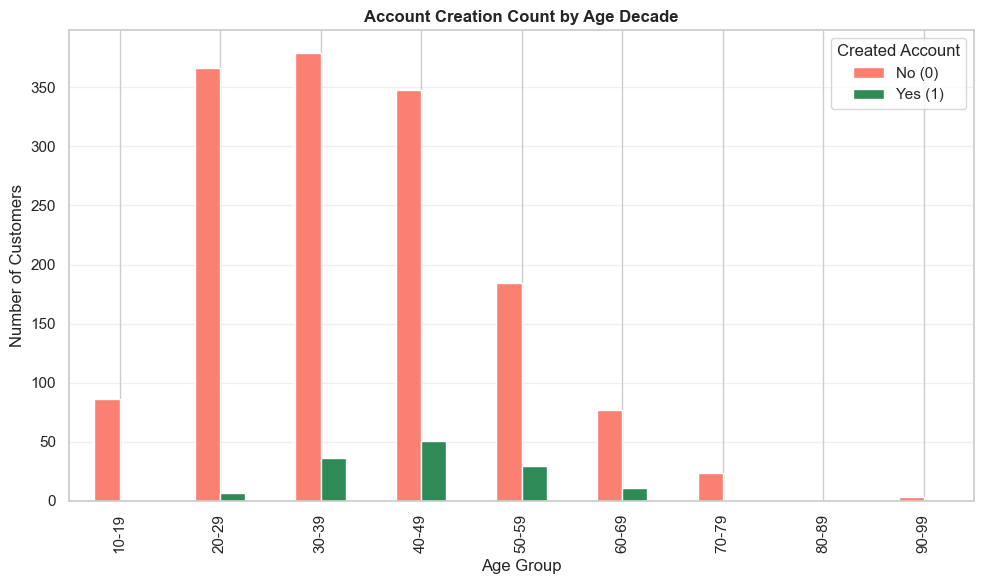

✓ Saved: ..\eda_plots\categorical_education.png


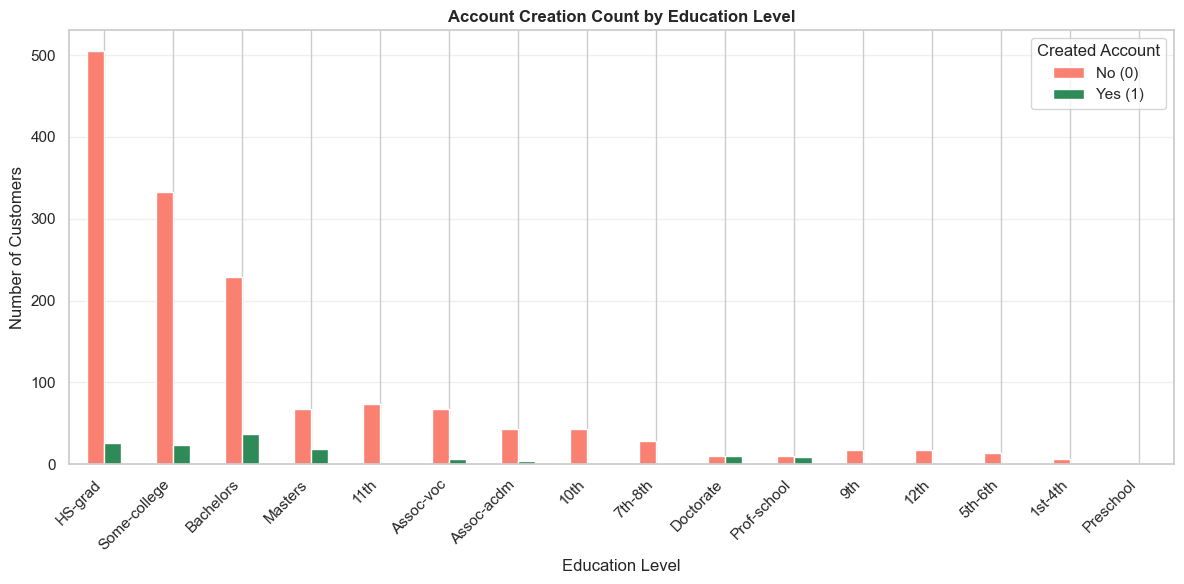

In [125]:
# Categorical variable distributions by target
# Reconstruct categorical columns for visualization
df = merged_df_clean_encoded.copy()

# Age Group Plot
age_group_cols = [col for col in df.columns if col.startswith('age_') and '-' in col]
age_long = df[['created_account'] + age_group_cols].melt(id_vars='created_account', var_name='age_group', value_name='is_member')
age_long = age_long[age_long['is_member'] == 1].copy()
age_long['age_group'] = age_long['age_group'].str.replace('age_', '')
age_counts = age_long.groupby(['age_group', 'created_account']).size().unstack(fill_value=0)
age_counts = age_counts.loc[sorted(age_counts.index, key=lambda x: int(x.split('-')[0]))]
age_counts.plot(kind='bar', figsize=(10, 6), color=['salmon', 'seagreen'])
plt.title('Account Creation Count by Age Decade', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'categorical_age_group.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / 'categorical_age_group.png'}")
plt.show()
plt.close()

# Education Level Plot
edu_cols = [col for col in df.columns if col.startswith('edu_') and not col.startswith('edu_num_')]
edu_long = df[['created_account'] + edu_cols].melt(id_vars='created_account', var_name='education', value_name='is_member')
edu_long = edu_long[edu_long['is_member'] == 1].copy()
edu_long['education'] = edu_long['education'].str.replace('edu_', '')
edu_counts = edu_long.groupby(['education', 'created_account']).size().unstack(fill_value=0)
edu_counts['Total'] = edu_counts.sum(axis=1)
edu_counts = edu_counts.sort_values(by='Total', ascending=False).drop(columns='Total')
edu_counts.plot(kind='bar', figsize=(12, 6), color=['salmon', 'seagreen'])
plt.title('Account Creation Count by Education Level', fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'categorical_education.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / 'categorical_education.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\categorical_stacked_age_education.png


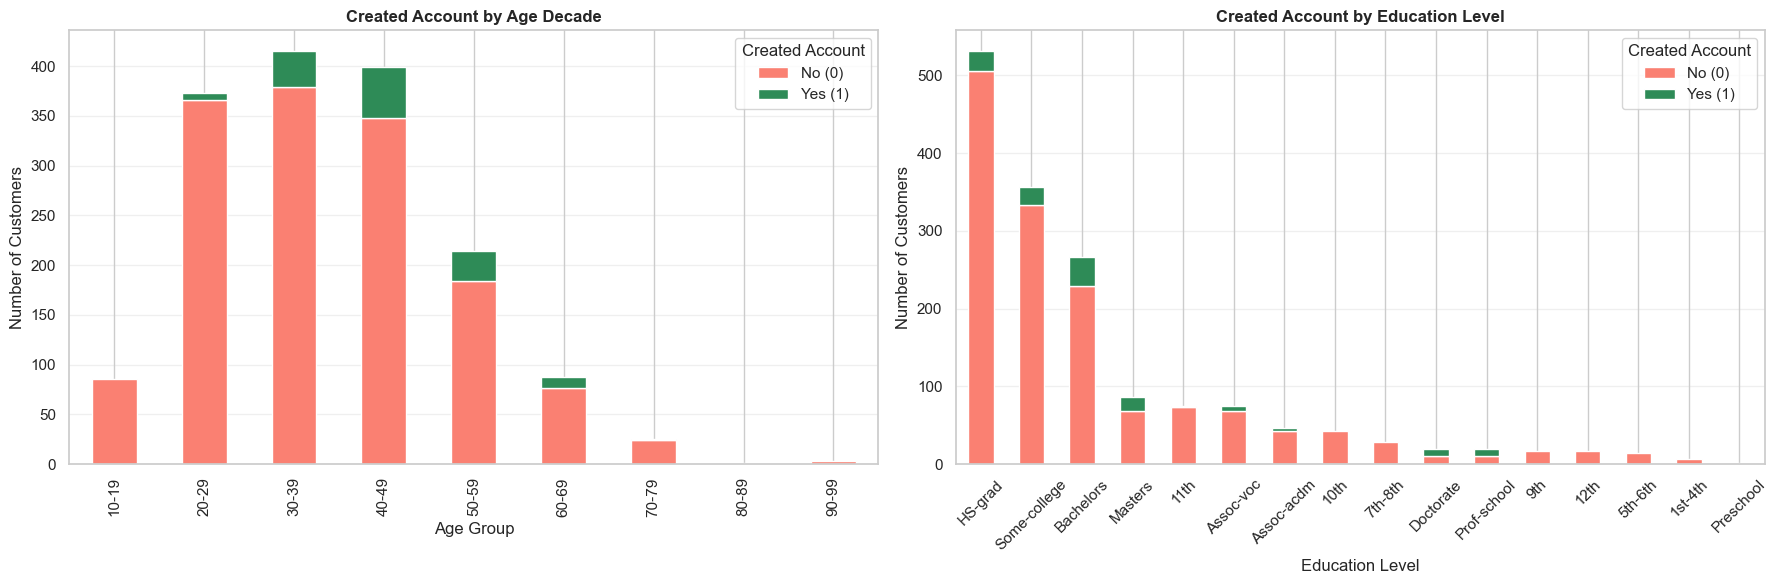

In [126]:
# Stacked bar charts for age and education
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Age Group - Stacked
age_group_cols = [col for col in df.columns if col.startswith('age_') and '-' in col]
age_long = df[['created_account'] + age_group_cols].melt(id_vars='created_account', var_name='age_group', value_name='is_member')
age_long = age_long[age_long['is_member'] == 1].copy()
age_long['age_group'] = age_long['age_group'].str.replace('age_', '')
age_counts = age_long.groupby(['age_group', 'created_account']).size().unstack(fill_value=0)
age_counts = age_counts.loc[sorted(age_counts.index, key=lambda x: int(x.split('-')[0]))]
age_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['salmon', 'seagreen'])
axes[0].set_title('Created Account by Age Decade', fontweight='bold')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
axes[0].grid(alpha=0.3, axis='y')

# Education Level - Stacked
edu_cols = [col for col in df.columns if col.startswith('edu_') and not col.startswith('edu_num_')]
edu_long = df[['created_account'] + edu_cols].melt(id_vars='created_account', var_name='education', value_name='is_member')
edu_long = edu_long[edu_long['is_member'] == 1].copy()
edu_long['education'] = edu_long['education'].str.replace('edu_', '')
edu_counts = edu_long.groupby(['education', 'created_account']).size().unstack(fill_value=0)
edu_counts['Total'] = edu_counts.sum(axis=1)
edu_counts = edu_counts.sort_values(by='Total', ascending=False).drop(columns='Total')
edu_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['salmon', 'seagreen'])
axes[1].set_title('Created Account by Education Level', fontweight='bold')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Number of Customers')
axes[1].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'categorical_stacked_age_education.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / 'categorical_stacked_age_education.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\categorical_marital_relationship.png


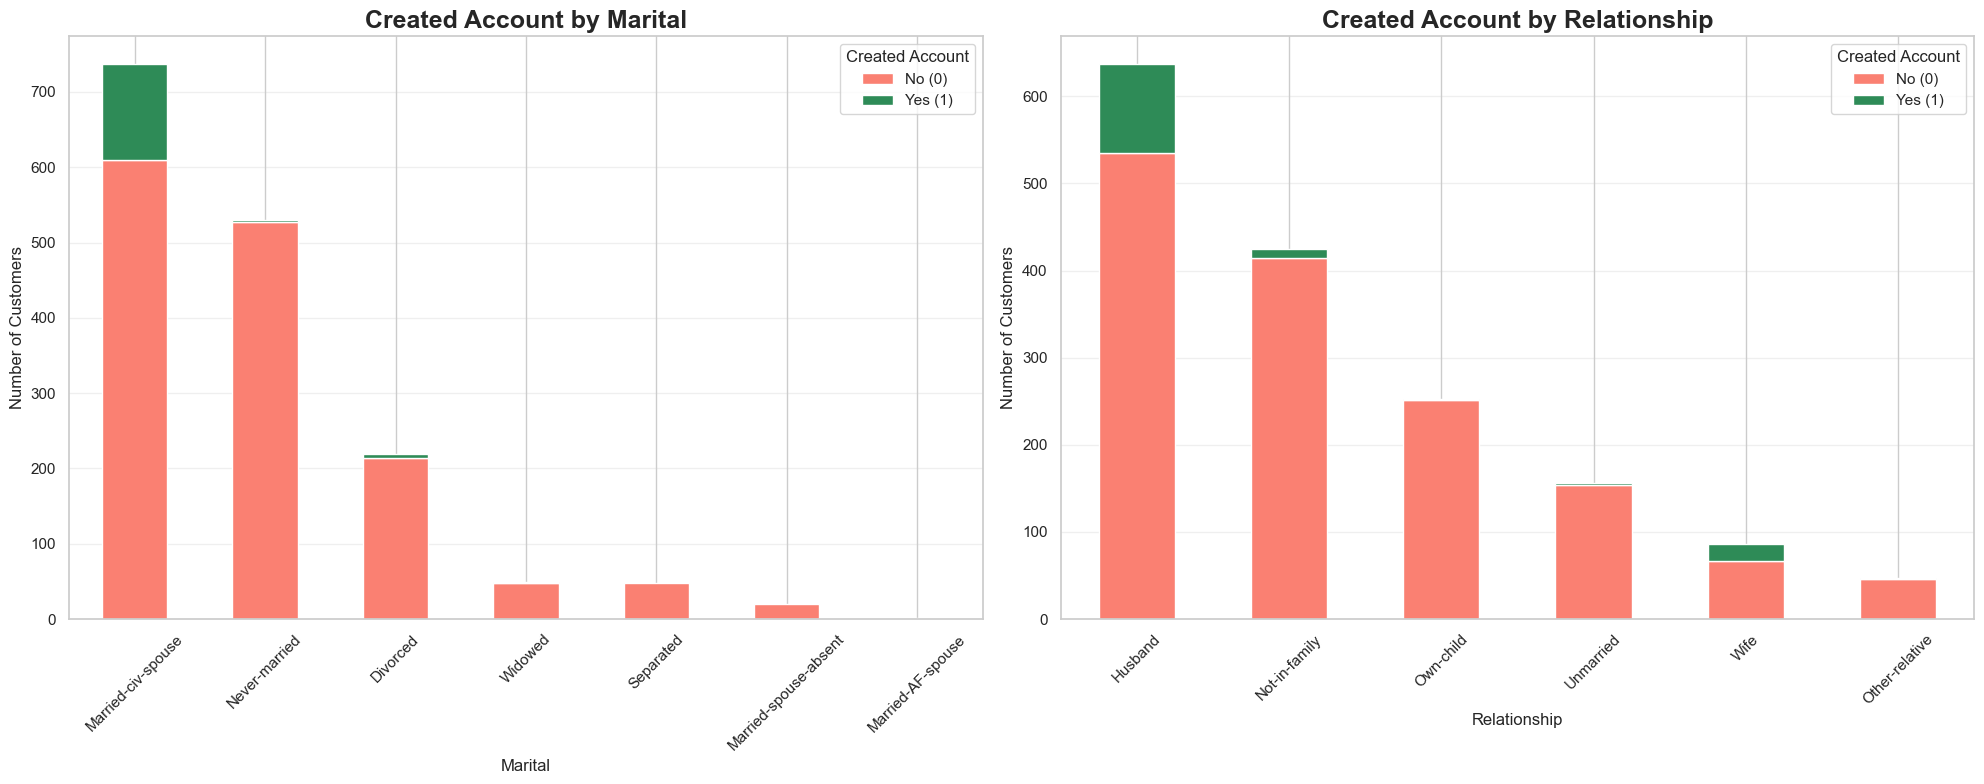

✓ Saved: ..\eda_plots\categorical_religion_workclass.png


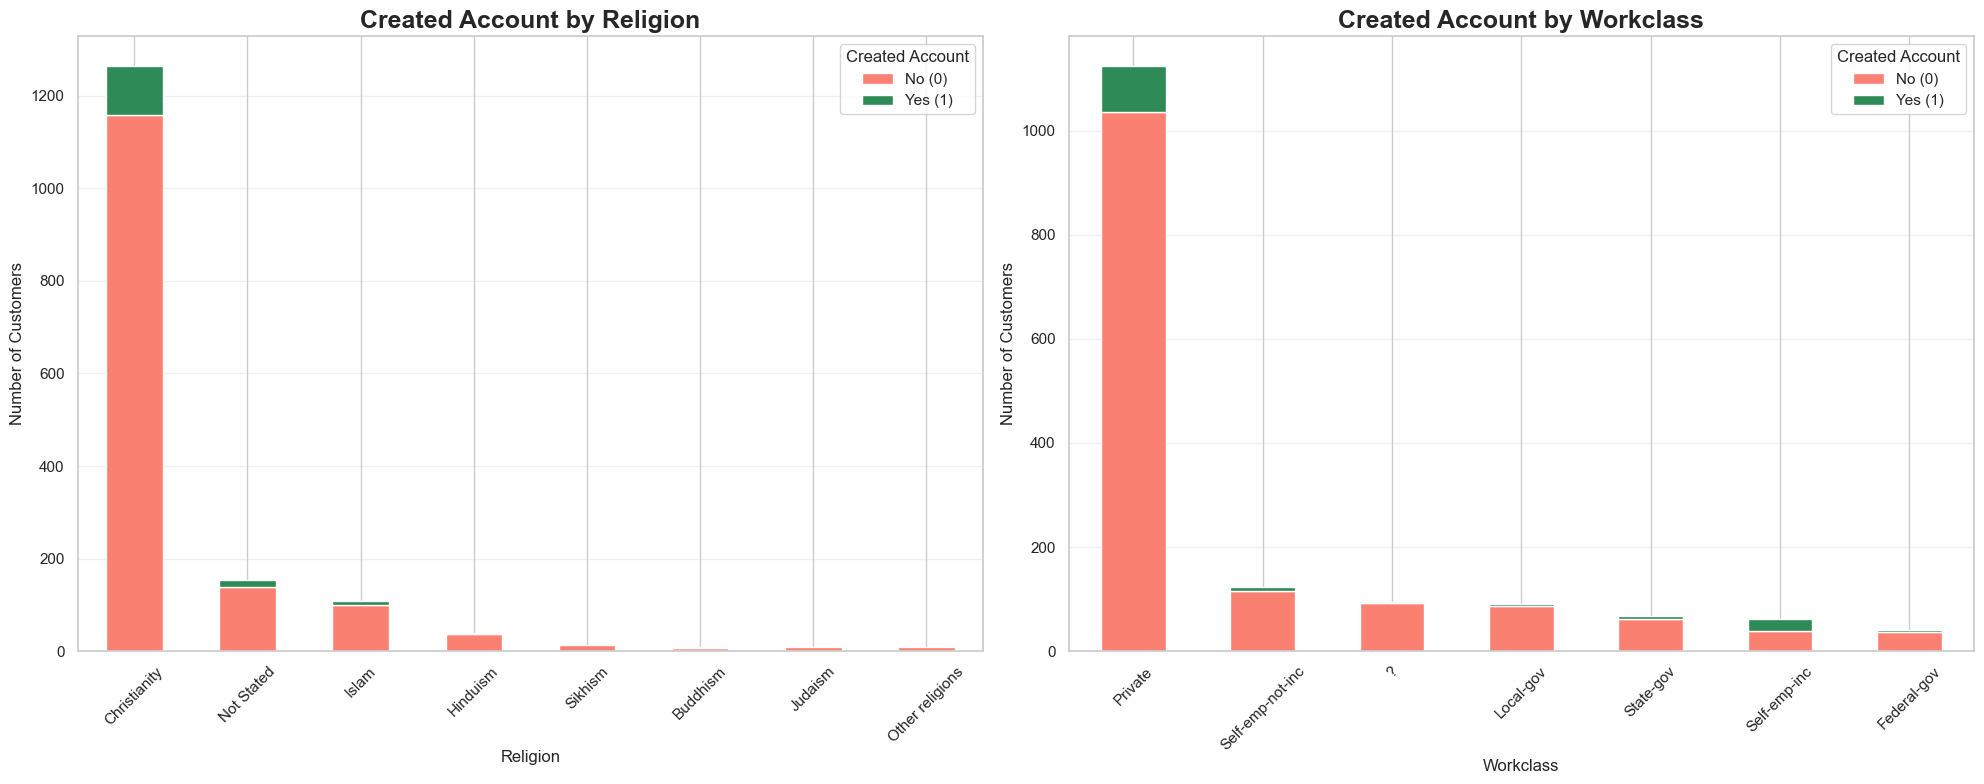

In [127]:
# One-Hot Encoded Groups Analysis
# Split into two separate figures as in notebook 02
group_prefixes_1 = ['marital_', 'relationship_']
group_prefixes_2 = ['religion_', 'workclass_']

# First plot: marital_ and relationship_
fig1, axes1 = plt.subplots(1, 2, figsize=(20, 8))
axes1 = axes1.flatten()

for i, prefix in enumerate(group_prefixes_1):
    group_cols = [col for col in df.columns if col.startswith(prefix)]
    df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
    df_long = df_long[df_long['is_member'] == 1].copy()
    df_long['category'] = df_long['category'].str.replace(prefix, '')
    counts = df_long.groupby(['category', 'created_account']).size().unstack(fill_value=0)
    counts['Total'] = counts.sum(axis=1)
    counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
    
    counts.plot(kind='bar', stacked=True, ax=axes1[i], color=['salmon', 'seagreen'])
    axes1[i].set_title(f'Created Account by {prefix[:-1].capitalize()}', fontweight='bold', fontsize=18)
    axes1[i].set_xlabel(f'{prefix[:-1].capitalize()}')
    axes1[i].set_ylabel('Number of Customers')
    axes1[i].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
    axes1[i].tick_params(axis='x', rotation=45)
    axes1[i].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'categorical_marital_relationship.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / 'categorical_marital_relationship.png'}")
plt.show()
plt.close()

# Second plot: religion_ and workclass_
fig2, axes2 = plt.subplots(1, 2, figsize=(20, 8))
axes2 = axes2.flatten()

for i, prefix in enumerate(group_prefixes_2):
    group_cols = [col for col in df.columns if col.startswith(prefix)]
    df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
    df_long = df_long[df_long['is_member'] == 1].copy()
    df_long['category'] = df_long['category'].str.replace(prefix, '')
    counts = df_long.groupby(['category', 'created_account']).size().unstack(fill_value=0)
    counts['Total'] = counts.sum(axis=1)
    counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
    
    counts.plot(kind='bar', stacked=True, ax=axes2[i], color=['salmon', 'seagreen'])
    axes2[i].set_title(f'Created Account by {prefix[:-1].capitalize()}', fontweight='bold', fontsize=18)
    axes2[i].set_xlabel(f'{prefix[:-1].capitalize()}')
    axes2[i].set_ylabel('Number of Customers')
    axes2[i].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
    axes2[i].tick_params(axis='x', rotation=45)
    axes2[i].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'categorical_religion_workclass.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / 'categorical_religion_workclass.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\categorical_other_groups_2.png


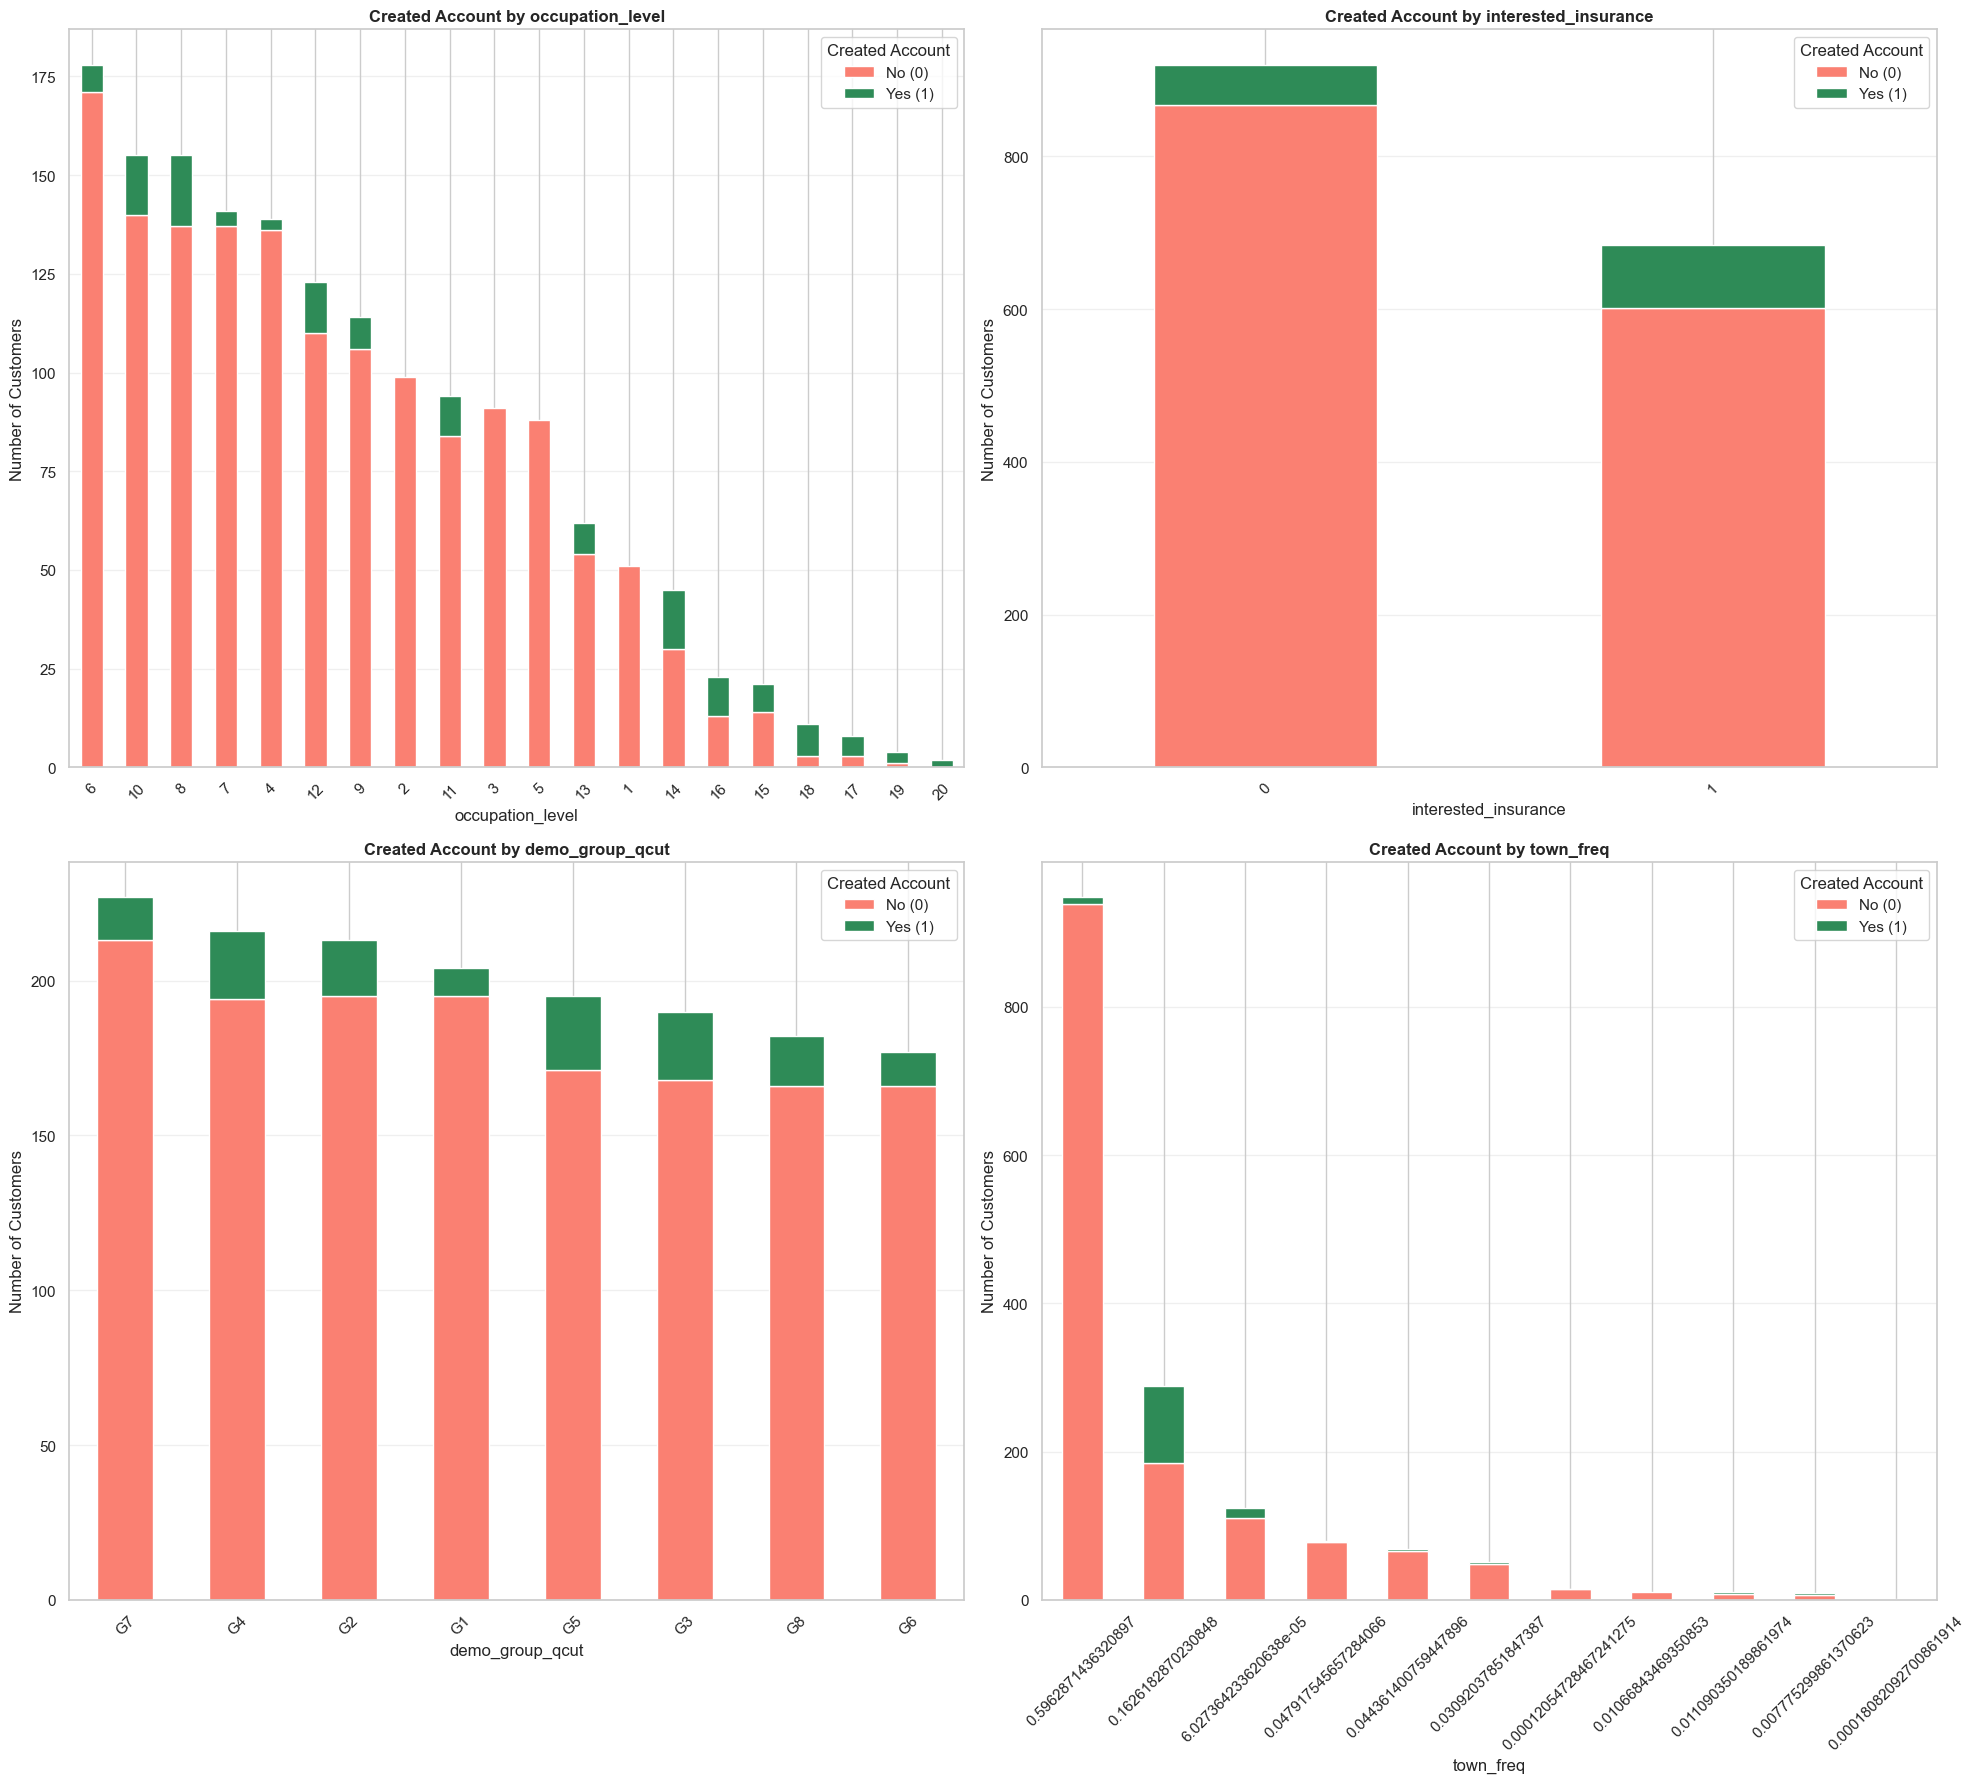

In [128]:
# Categorical/Ordinal Features Analysis
group_prefixes_2 = ['occupation_level', 'interested_insurance', 'demo_group_qcut', 'town_freq']
fig, axes = plt.subplots(2, 2, figsize=(20, 18))
axes = axes.flatten()

for i, prefix in enumerate(group_prefixes_2):
    if prefix in df.columns:
        counts = df.groupby([prefix, 'created_account']).size().unstack(fill_value=0)
        counts['Total'] = counts.sum(axis=1)
        counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
    else:
        group_cols = [col for col in df.columns if col.startswith(prefix)]
        df_long = df[['created_account'] + group_cols].melt(id_vars='created_account', var_name='category', value_name='is_member')
        df_long = df_long[df_long['is_member'] == 1].copy()
        df_long['category'] = df_long['category'].str.replace(prefix, '')
        counts = df_long.groupby(['category', 'created_account']).size().unstack(fill_value=0)
        counts['Total'] = counts.sum(axis=1)
        counts = counts.sort_values(by='Total', ascending=False).drop(columns='Total')
    
    counts.plot(kind='bar', stacked=True, ax=axes[i], color=['salmon', 'seagreen'])
    axes[i].set_title(f'Created Account by {prefix}', fontweight='bold')
    axes[i].set_xlabel(f'{prefix}')
    axes[i].set_ylabel('Number of Customers')
    axes[i].legend(title='Created Account', labels=['No (0)', 'Yes (1)'])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'categorical_other_groups_2.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / 'categorical_other_groups_2.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\01_target_distribution.png


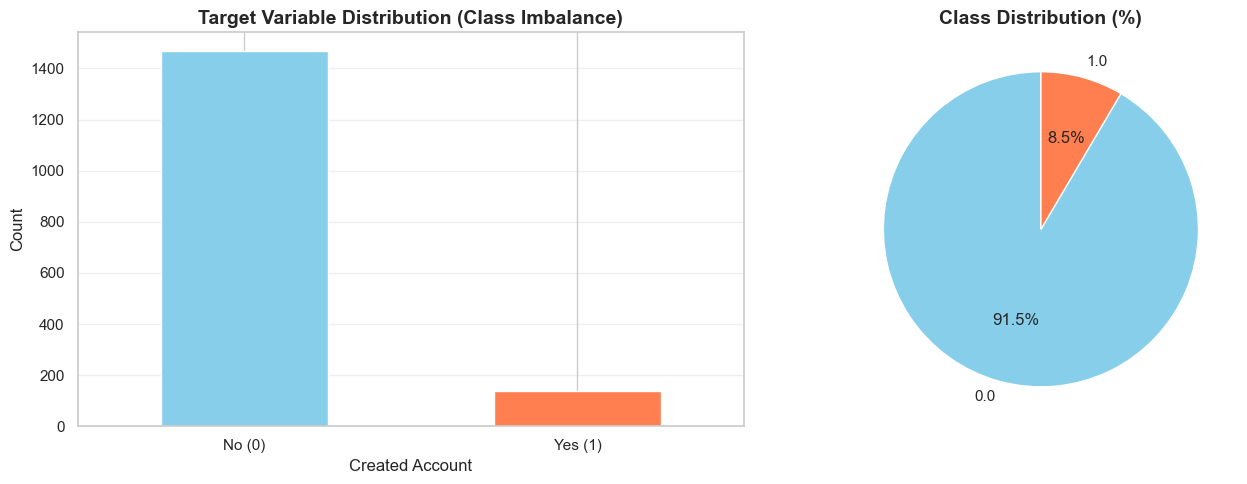

Class imbalance ratio: 10.79:1


In [129]:
# 1. TARGET VARIABLE DISTRIBUTION & CLASS IMBALANCE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
clean_df['created_account'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'coral'])
axes[0].set_title('Target Variable Distribution (Class Imbalance)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Created Account')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
clean_df['created_account'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                                 colors=['skyblue', 'coral'], startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig(PLOTS_DIR / '01_target_distribution.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '01_target_distribution.png'}")
plt.show()
plt.close()

print(f"Class imbalance ratio: {clean_df['created_account'].value_counts()[0] / clean_df['created_account'].value_counts()[1]:.2f}:1")


✓ Saved: ..\eda_plots\02_numeric_distributions.png


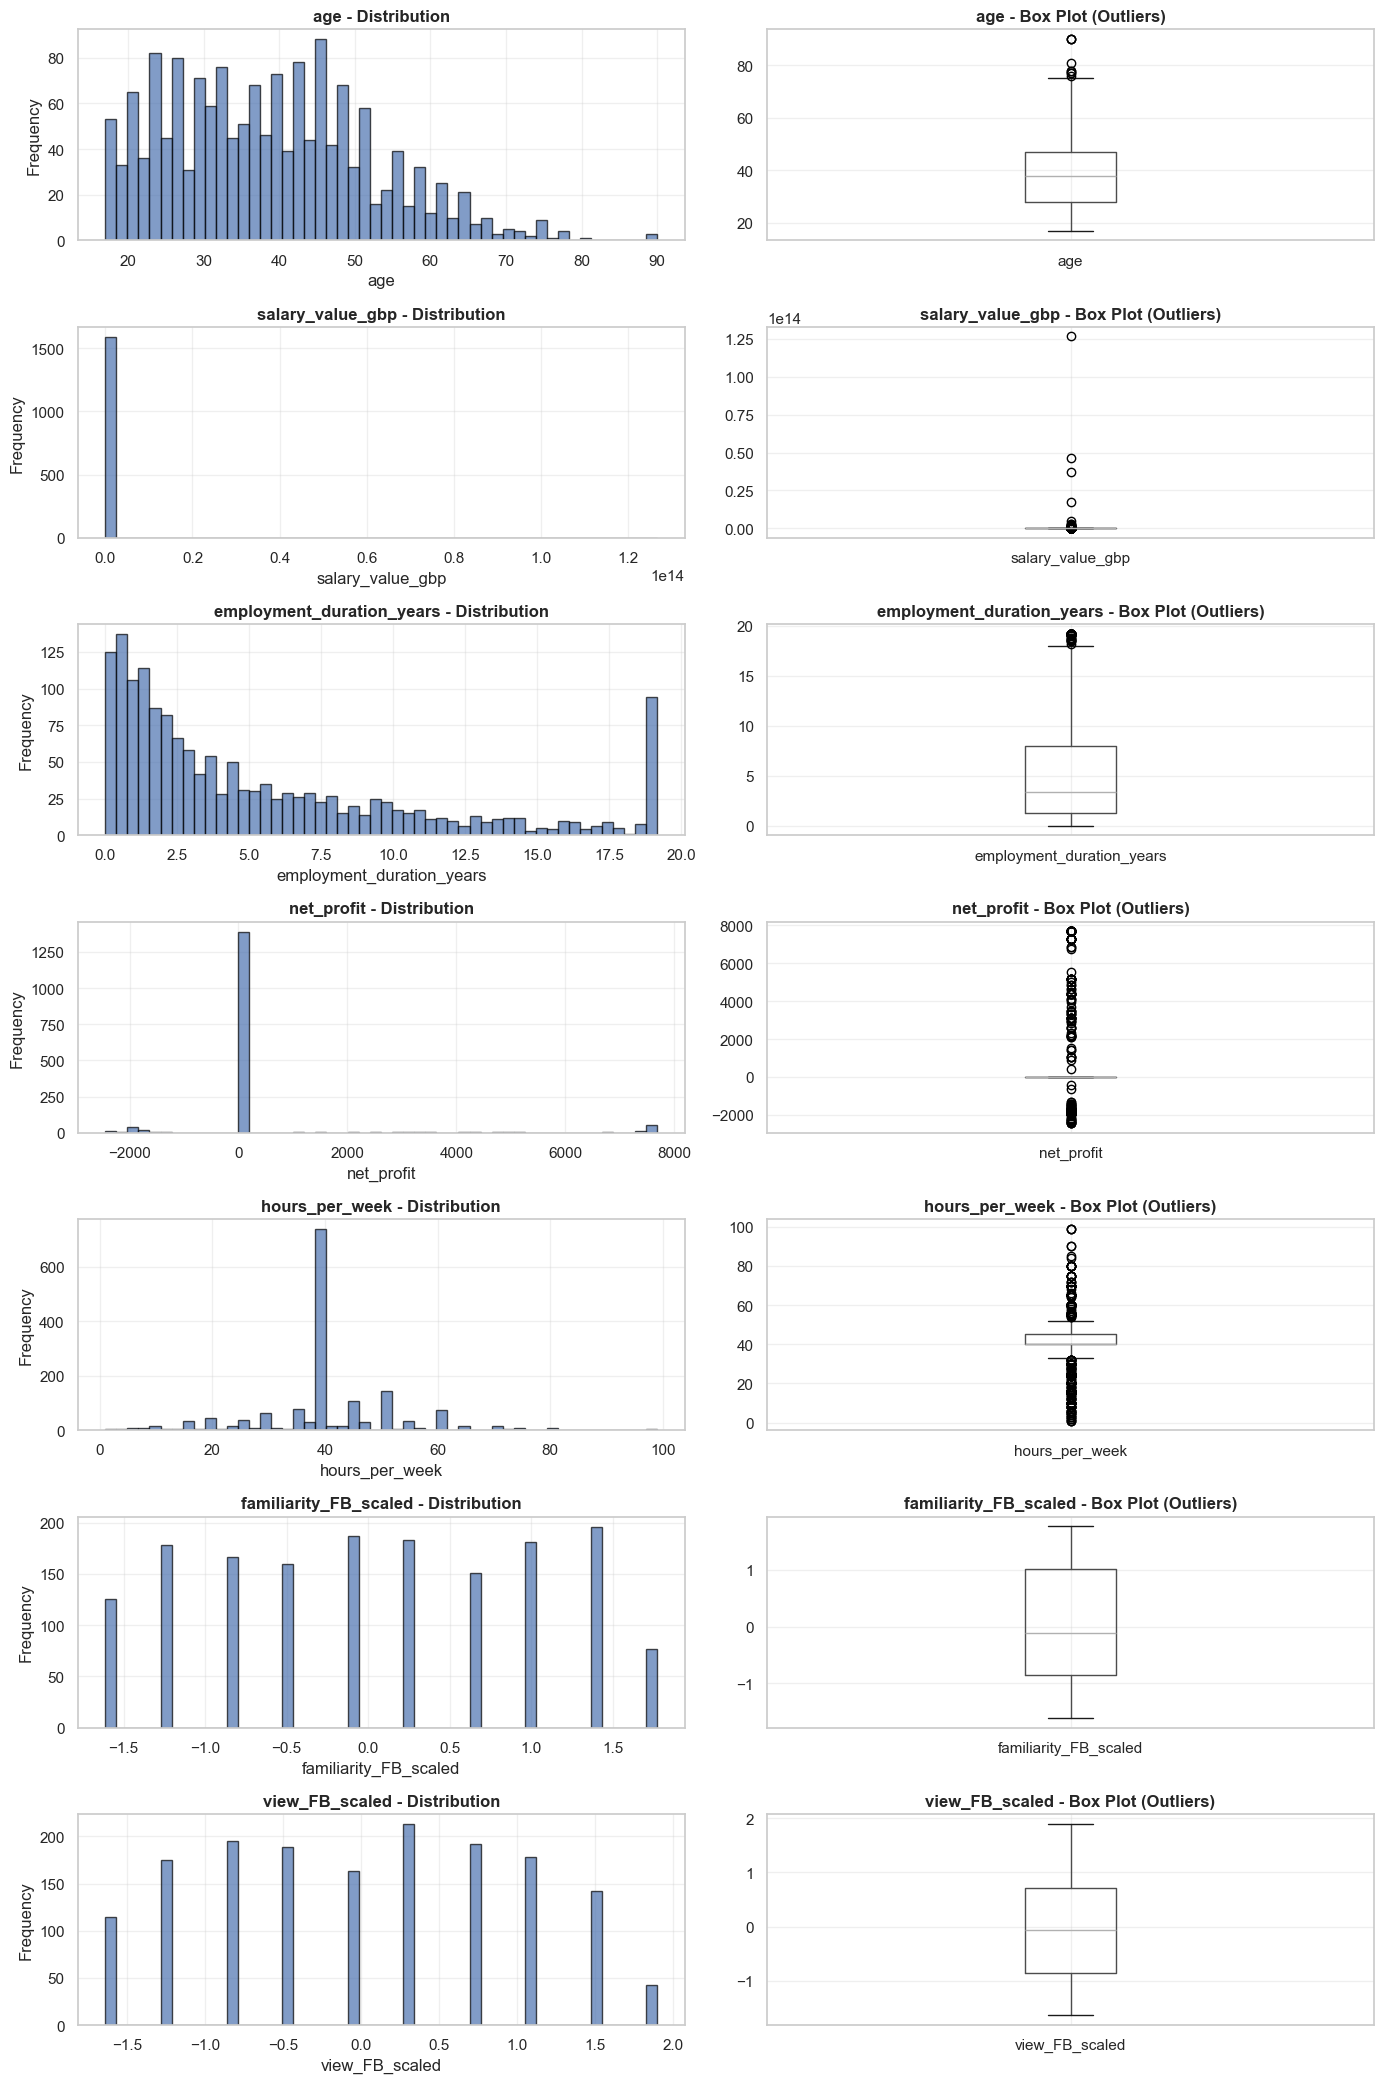

In [130]:
# 2. NUMERIC FEATURE DISTRIBUTIONS (Histograms & Box Plots)
numeric_features = ['age', 'salary_value_gbp', 'employment_duration_years', 
                    'net_profit', 'hours_per_week', 'familiarity_FB_scaled', 'view_FB_scaled']

# Ensure all numeric features are truly numeric
for col in numeric_features:
    if col in clean_df.columns:
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

fig, axes = plt.subplots(len(numeric_features), 2, figsize=(14, 3 * len(numeric_features)))

for idx, feature in enumerate(numeric_features):
    if feature in clean_df.columns:
        # Histogram
        clean_df[feature].hist(bins=50, ax=axes[idx, 0], edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'{feature} - Distribution', fontweight='bold')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Frequency')
        axes[idx, 0].grid(alpha=0.3)

        # Box plot
        clean_df.boxplot(column=feature, ax=axes[idx, 1], vert=True)
        axes[idx, 1].set_title(f'{feature} - Box Plot (Outliers)', fontweight='bold')
        axes[idx, 1].grid(alpha=0.3)
    else:
        # Optional: annotate missing features
        axes[idx, 0].text(0.5, 0.5, f'{feature} not found', ha='center', va='center')
        axes[idx, 1].text(0.5, 0.5, f'{feature} not found', ha='center', va='center')
        for ax in axes[idx]:
            ax.set_axis_off()

plt.tight_layout()
plt.savefig(PLOTS_DIR / '02_numeric_distributions.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '02_numeric_distributions.png'}")
plt.show()
plt.close()

✓ Saved: ..\eda_plots\03_feature_distributions_by_target.png


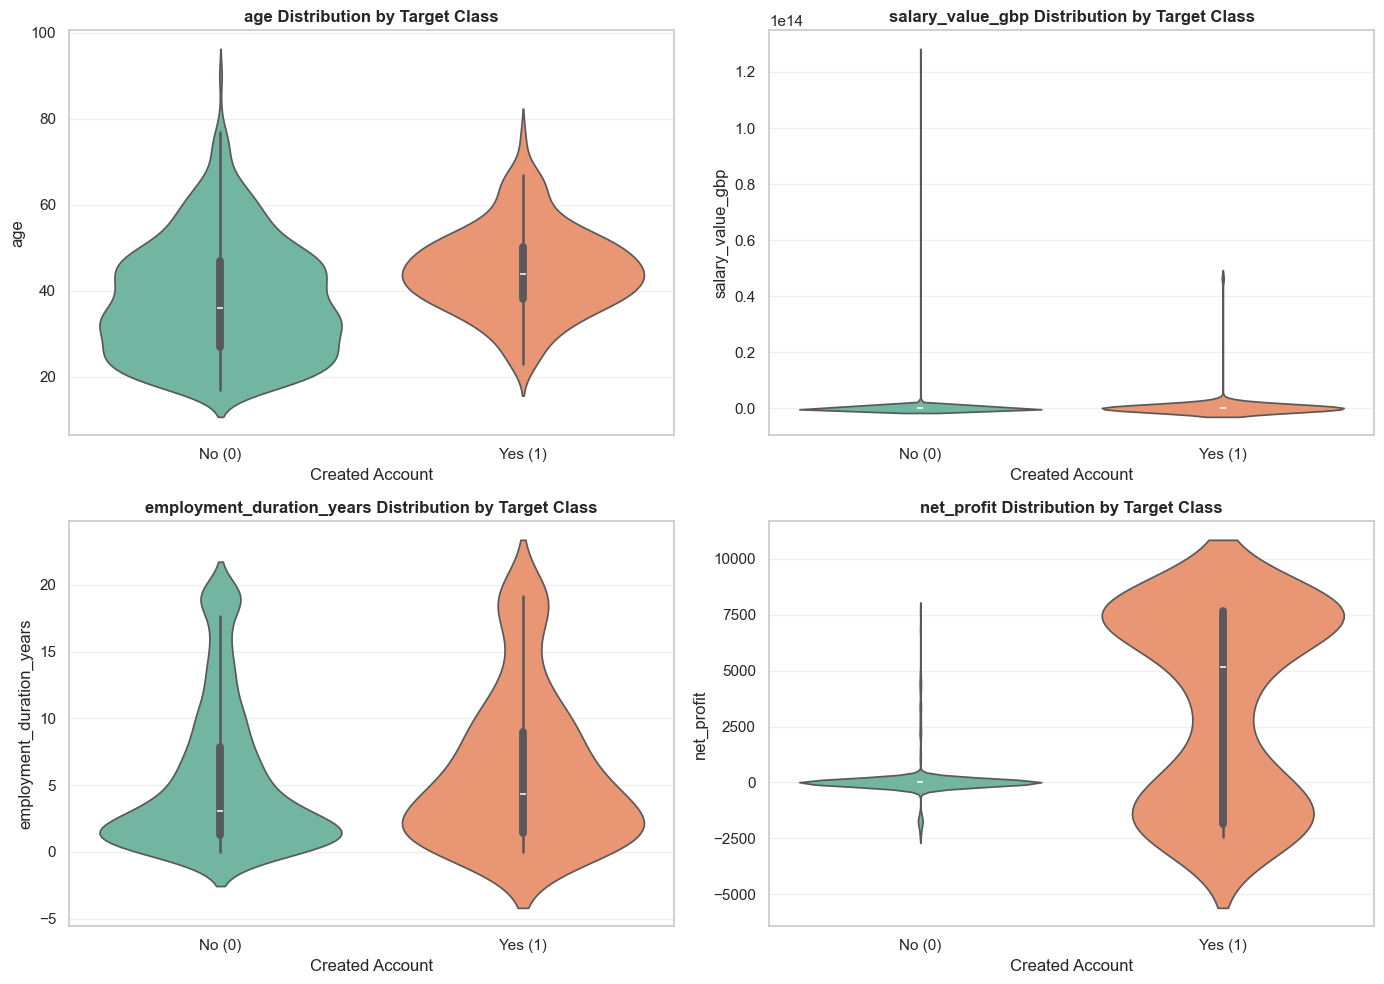

In [131]:
# 3. FEATURE DISTRIBUTIONS BY TARGET CLASS (Violin/Box Plots)
key_numeric = ['age', 'salary_value_gbp', 'employment_duration_years', 'net_profit']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_numeric):
    if feature in clean_df.columns:
        # Violin plot
        sns.violinplot(data=clean_df, x='created_account', y=feature, ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'{feature} Distribution by Target Class', fontweight='bold')
        axes[idx].set_xlabel('Created Account')
        axes[idx].set_xticklabels(['No (0)', 'Yes (1)'])
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '03_feature_distributions_by_target.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '03_feature_distributions_by_target.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\04_correlation_heatmap.png


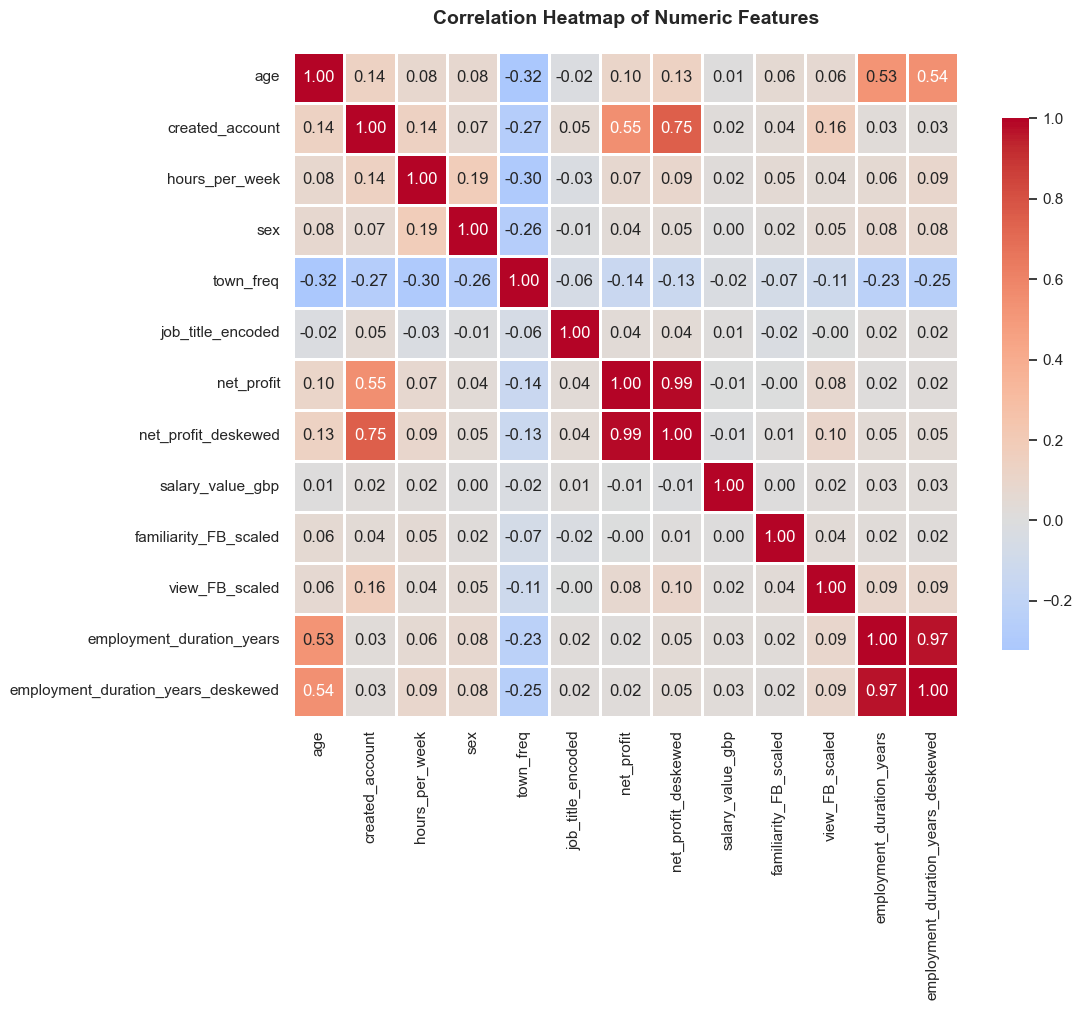

In [132]:
# 4. CORRELATION HEATMAP (for numeric features)
numeric_cols = clean_df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target and encoded columns for cleaner view
corr_cols = [col for col in numeric_cols if not any(x in col for x in ['edu_', 'age_', 'marital_', 'religion_', 'relationship_', 'workclass_', 'race_', 'native_country_', 'edu_num_'])]

corr_matrix = clean_df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(PLOTS_DIR / '04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '04_correlation_heatmap.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\05_categorical_distributions_by_target.png


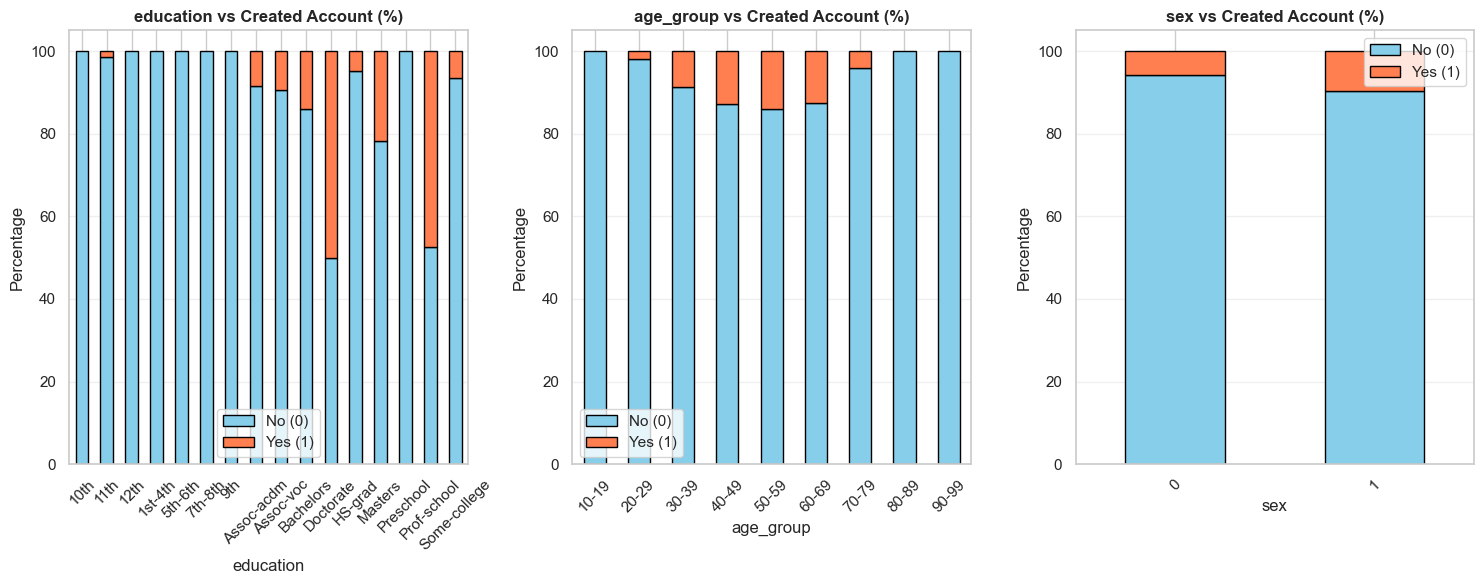

In [133]:
# 5. CATEGORICAL VARIABLE DISTRIBUTIONS BY TARGET (Stacked Bar Charts)
# Reconstruct categorical columns for visualization
if 'education' not in clean_df.columns:
    edu_cols = [col for col in clean_df.columns if col.startswith('edu_')]
    if edu_cols:
        clean_df['education'] = clean_df[edu_cols].idxmax(axis=1).str.replace('edu_', '')

if 'age_group' not in clean_df.columns:
    age_cols = [col for col in clean_df.columns if col.startswith('age_')]
    if age_cols:
        clean_df['age_group'] = clean_df[age_cols].idxmax(axis=1).str.replace('age_', '')

categorical_vars = ['education', 'age_group', 'sex']
categorical_vars = [var for var in categorical_vars if var in clean_df.columns]

fig, axes = plt.subplots(1, len(categorical_vars), figsize=(5*len(categorical_vars), 6))

for idx, var in enumerate(categorical_vars):
    if var in clean_df.columns:
        crosstab = pd.crosstab(clean_df[var], clean_df['created_account'], normalize='index') * 100
        crosstab.plot(kind='bar', stacked=True, ax=axes[idx], color=['skyblue', 'coral'], edgecolor='black')
        axes[idx].set_title(f'{var} vs Created Account (%)', fontweight='bold')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Percentage')
        axes[idx].legend(['No (0)', 'Yes (1)'])
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '05_categorical_distributions_by_target.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '05_categorical_distributions_by_target.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\06_scatter_plots.png


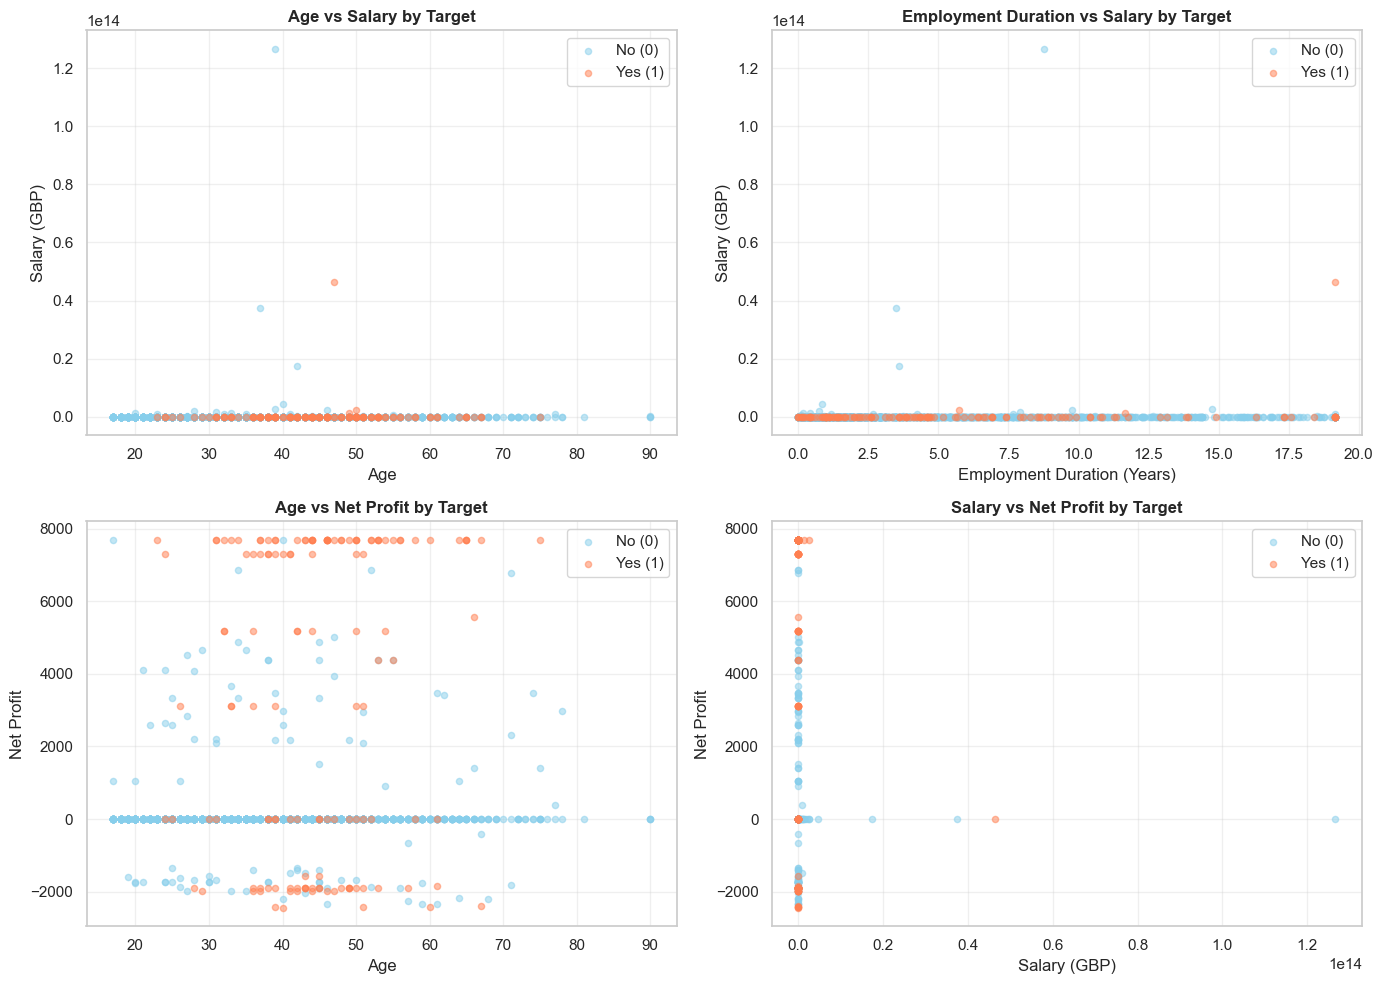

In [134]:
# 6. SCATTER PLOTS: Key Feature Relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age vs Salary by Target
if 'age' in clean_df.columns and 'salary_value_gbp' in clean_df.columns:
    scatter1 = axes[0, 0].scatter(clean_df[clean_df['created_account']==0]['age'], 
                                  clean_df[clean_df['created_account']==0]['salary_value_gbp'],
                                  alpha=0.5, label='No (0)', color='skyblue', s=20)
    scatter2 = axes[0, 0].scatter(clean_df[clean_df['created_account']==1]['age'], 
                                  clean_df[clean_df['created_account']==1]['salary_value_gbp'],
                                  alpha=0.5, label='Yes (1)', color='coral', s=20)
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Salary (GBP)')
    axes[0, 0].set_title('Age vs Salary by Target', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

# Employment Duration vs Salary by Target
if 'employment_duration_years' in clean_df.columns and 'salary_value_gbp' in clean_df.columns:
    axes[0, 1].scatter(clean_df[clean_df['created_account']==0]['employment_duration_years'], 
                       clean_df[clean_df['created_account']==0]['salary_value_gbp'],
                       alpha=0.5, label='No (0)', color='skyblue', s=20)
    axes[0, 1].scatter(clean_df[clean_df['created_account']==1]['employment_duration_years'], 
                       clean_df[clean_df['created_account']==1]['salary_value_gbp'],
                       alpha=0.5, label='Yes (1)', color='coral', s=20)
    axes[0, 1].set_xlabel('Employment Duration (Years)')
    axes[0, 1].set_ylabel('Salary (GBP)')
    axes[0, 1].set_title('Employment Duration vs Salary by Target', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

# Age vs Net Profit by Target
if 'age' in clean_df.columns and 'net_profit' in clean_df.columns:
    axes[1, 0].scatter(clean_df[clean_df['created_account']==0]['age'], 
                       clean_df[clean_df['created_account']==0]['net_profit'],
                       alpha=0.5, label='No (0)', color='skyblue', s=20)
    axes[1, 0].scatter(clean_df[clean_df['created_account']==1]['age'], 
                       clean_df[clean_df['created_account']==1]['net_profit'],
                       alpha=0.5, label='Yes (1)', color='coral', s=20)
    axes[1, 0].set_xlabel('Age')
    axes[1, 0].set_ylabel('Net Profit')
    axes[1, 0].set_title('Age vs Net Profit by Target', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

# Salary vs Net Profit by Target
if 'salary_value_gbp' in clean_df.columns and 'net_profit' in clean_df.columns:
    axes[1, 1].scatter(clean_df[clean_df['created_account']==0]['salary_value_gbp'], 
                       clean_df[clean_df['created_account']==0]['net_profit'],
                       alpha=0.5, label='No (0)', color='skyblue', s=20)
    axes[1, 1].scatter(clean_df[clean_df['created_account']==1]['salary_value_gbp'], 
                       clean_df[clean_df['created_account']==1]['net_profit'],
                       alpha=0.5, label='Yes (1)', color='coral', s=20)
    axes[1, 1].set_xlabel('Salary (GBP)')
    axes[1, 1].set_ylabel('Net Profit')
    axes[1, 1].set_title('Salary vs Net Profit by Target', fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '06_scatter_plots.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '06_scatter_plots.png'}")
plt.show()
plt.close()


✓ Saved: ..\eda_plots\07_missing_values.png


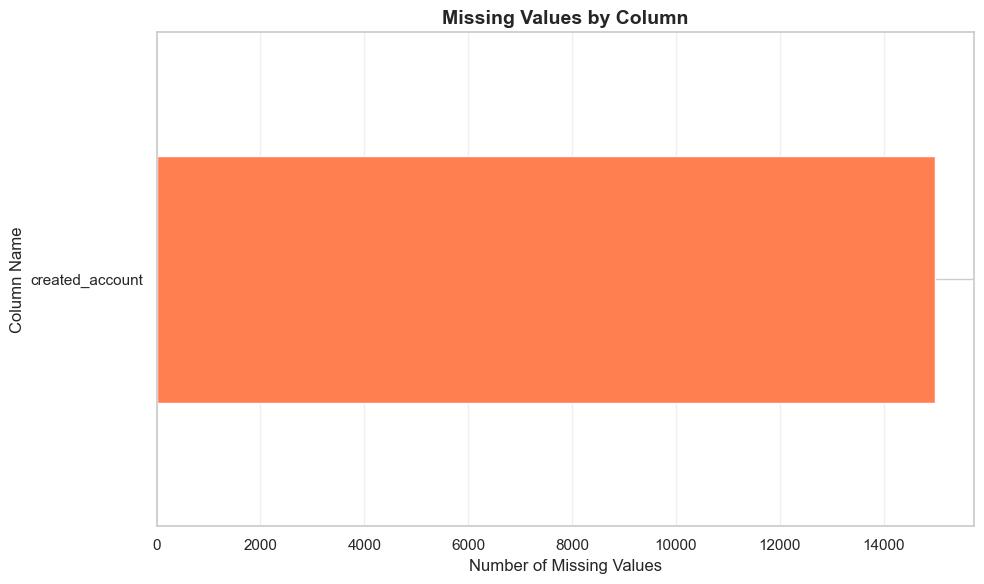

Missing values percentage:
created_account    90.33
dtype: float64


In [135]:
# 7. MISSING VALUES VISUALIZATION
missing_data = merged_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    missing_data.plot(kind='barh', color='coral')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Column Name')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '07_missing_values.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {PLOTS_DIR / '07_missing_values.png'}")
    plt.show()
    plt.close()
    
    # Percentage missing
    missing_pct = (missing_data / len(merged_df) * 100).round(2)
    print("Missing values percentage:")
    print(missing_pct)
else:
    print("No missing values found in merged dataset")


Outlier Summary (IQR Method):


,Feature,Outliers Count,Outlier %,Lower Bound,Upper Bound
0,age,9,0.56,-0.500,75.500
1,salary_value_gbp,208,12.97,-6632.550,62421.930
2,employment_duration_years,103,6.42,-8.875,18.125
3,net_profit,215,13.40,0.000,0.000


✓ Saved: ..\eda_plots\08_outlier_detection.png


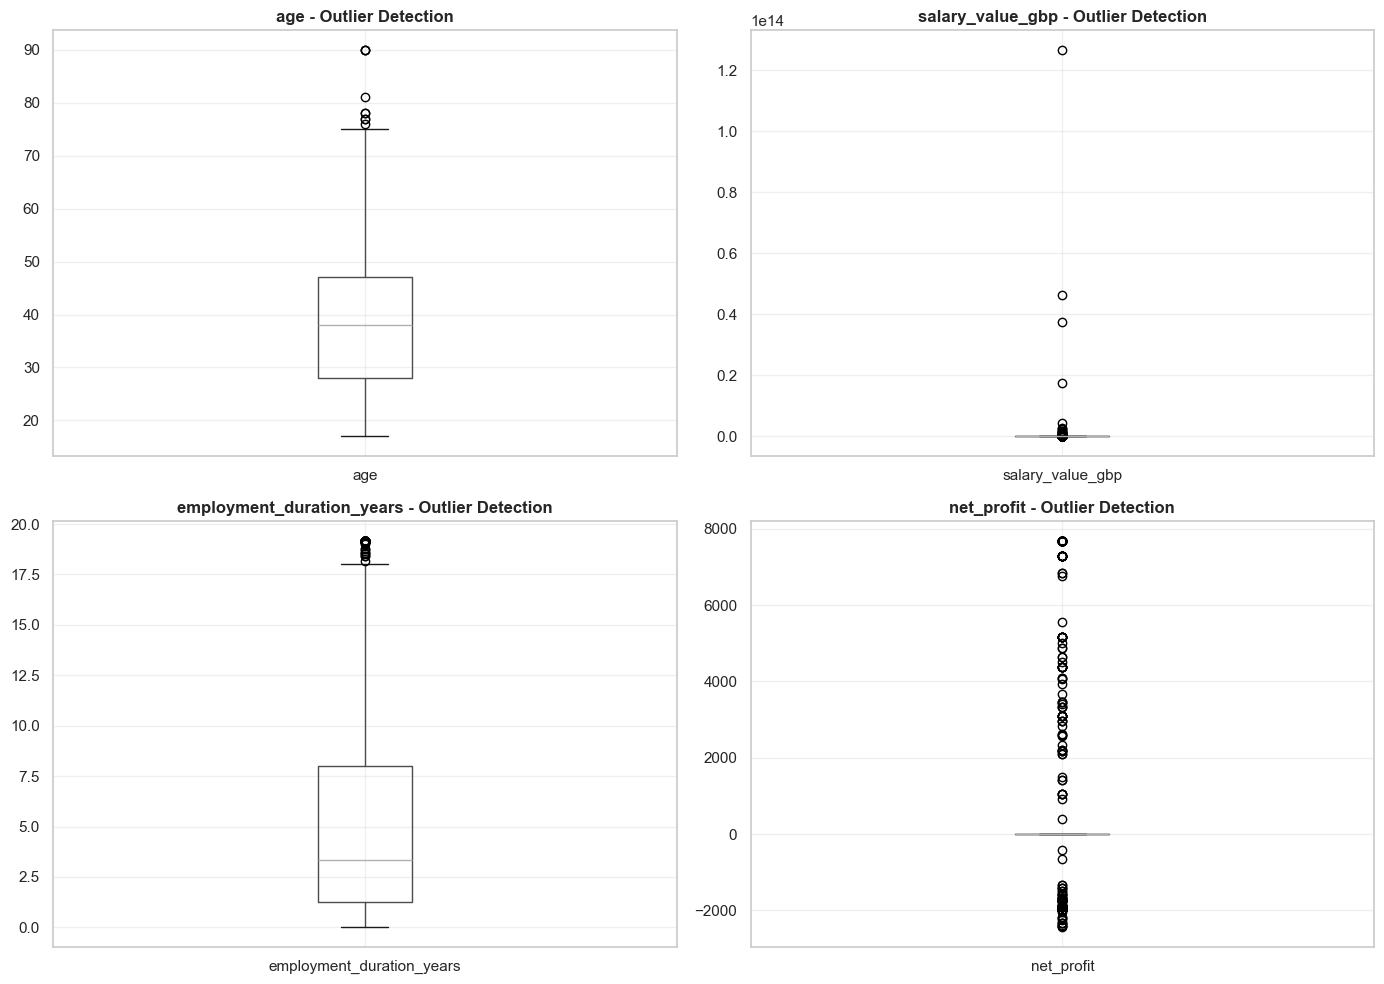

In [136]:
# 8. OUTLIER DETECTION (IQR Method) for Key Numeric Features
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

key_features = ['age', 'salary_value_gbp', 'employment_duration_years', 'net_profit']
key_features = [f for f in key_features if f in clean_df.columns]

outlier_summary = []
for feature in key_features:
    outliers, lower, upper = detect_outliers_iqr(clean_df, feature)
    outlier_summary.append({
        'Feature': feature,
        'Outliers Count': len(outliers),
        'Outlier %': round(len(outliers) / len(clean_df) * 100, 2),
        'Lower Bound': lower,
        'Upper Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Summary (IQR Method):")
display(outlier_df)

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    clean_df.boxplot(column=feature, ax=axes[idx], vert=True)
    axes[idx].set_title(f'{feature} - Outlier Detection', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '08_outlier_detection.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '08_outlier_detection.png'}")
plt.show()
plt.close()


In [137]:
# 9. STATISTICAL SUMMARY BY TARGET CLASS
numeric_cols = ['age', 'salary_value_gbp', 'employment_duration_years', 'net_profit', 'hours_per_week']
numeric_cols = [col for col in numeric_cols if col in clean_df.columns]

summary_by_target = clean_df.groupby('created_account')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])
print("Statistical Summary by Target Class:")
display(summary_by_target)


Statistical Summary by Target Class:


age                           salary_value_gbp                                               employment_duration_years         \
                      mean median        std min max             mean   median           std      min           max                      mean median   
created_account                                                                                                                                        
0.0              38.051090   36.0  13.531129  17  90     1.399343e+11  23402.0  3.487580e+12   936.96  1.266339e+14                  5.418713   3.08   
1.0              44.823529   44.0   9.834092  23  75     3.741820e+11  35878.5  4.005772e+12  8328.64  4.631446e+13                  6.015515   4.33   

                                        net_profit                                      hours_per_week                            
                      std  min    max         mean  median          std     min     max           mean median        std min max  
created_account                                                                                                                   
0.0              5.500867  0.0  19.17    67.669619     0.0   783.465605 -2339.0  7688.0      39.960490   40.0  12.111831   1  99  
1.0              5.598846  0.0  19.17  3446.367647  5178.0  4224.723501 -2444.0  7688.0      46.294118   45.0  12.466321   1  99

✓ Saved: ..\eda_plots\10_pair_plot.png


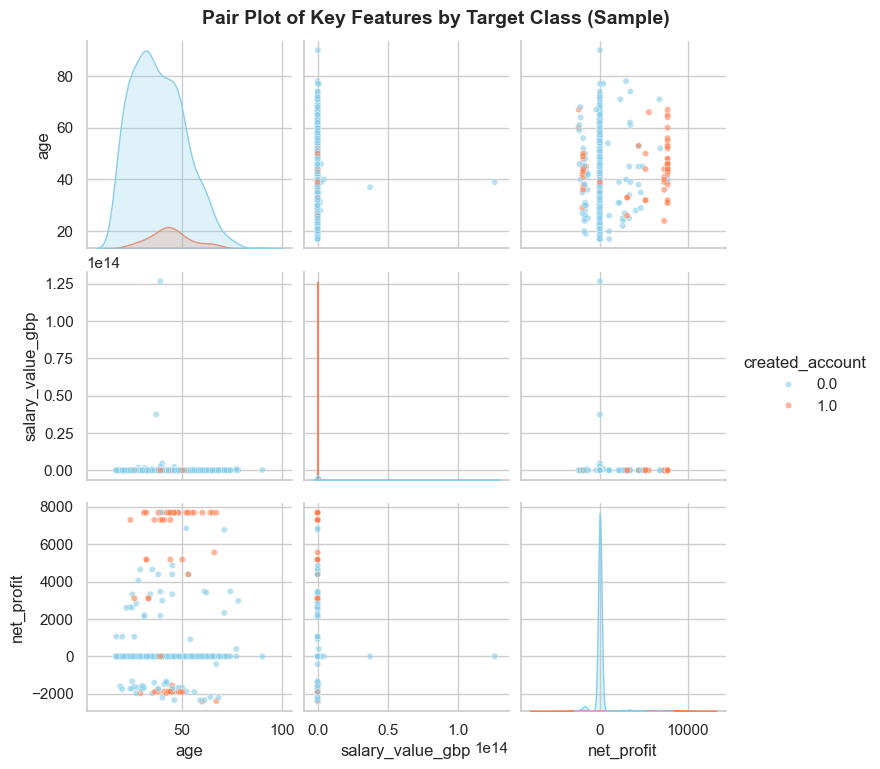

In [138]:
# 10. PAIR PLOT for Key Numeric Features (Sample)
# Sample data for faster plotting
sample_size = min(1000, len(clean_df))
sample_df = clean_df.sample(n=sample_size, random_state=1234)

key_features_pair = ['age', 'salary_value_gbp', 'net_profit', 'created_account']
key_features_pair = [f for f in key_features_pair if f in sample_df.columns]

if len(key_features_pair) >= 3:
    pair_plot_df = sample_df[key_features_pair].copy()
    pair_plot_df['created_account'] = pair_plot_df['created_account'].astype(str)
    
    g = sns.pairplot(pair_plot_df, hue='created_account', diag_kind='kde', 
                     palette=['skyblue', 'coral'], plot_kws={'alpha': 0.6, 's': 20})
    g.fig.suptitle('Pair Plot of Key Features by Target Class (Sample)', y=1.02, fontsize=14, fontweight='bold')
    plt.savefig(PLOTS_DIR / '10_pair_plot.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {PLOTS_DIR / '10_pair_plot.png'}")
    plt.show()
    plt.close()


✓ Saved: ..\eda_plots\11_cdf_plots.png


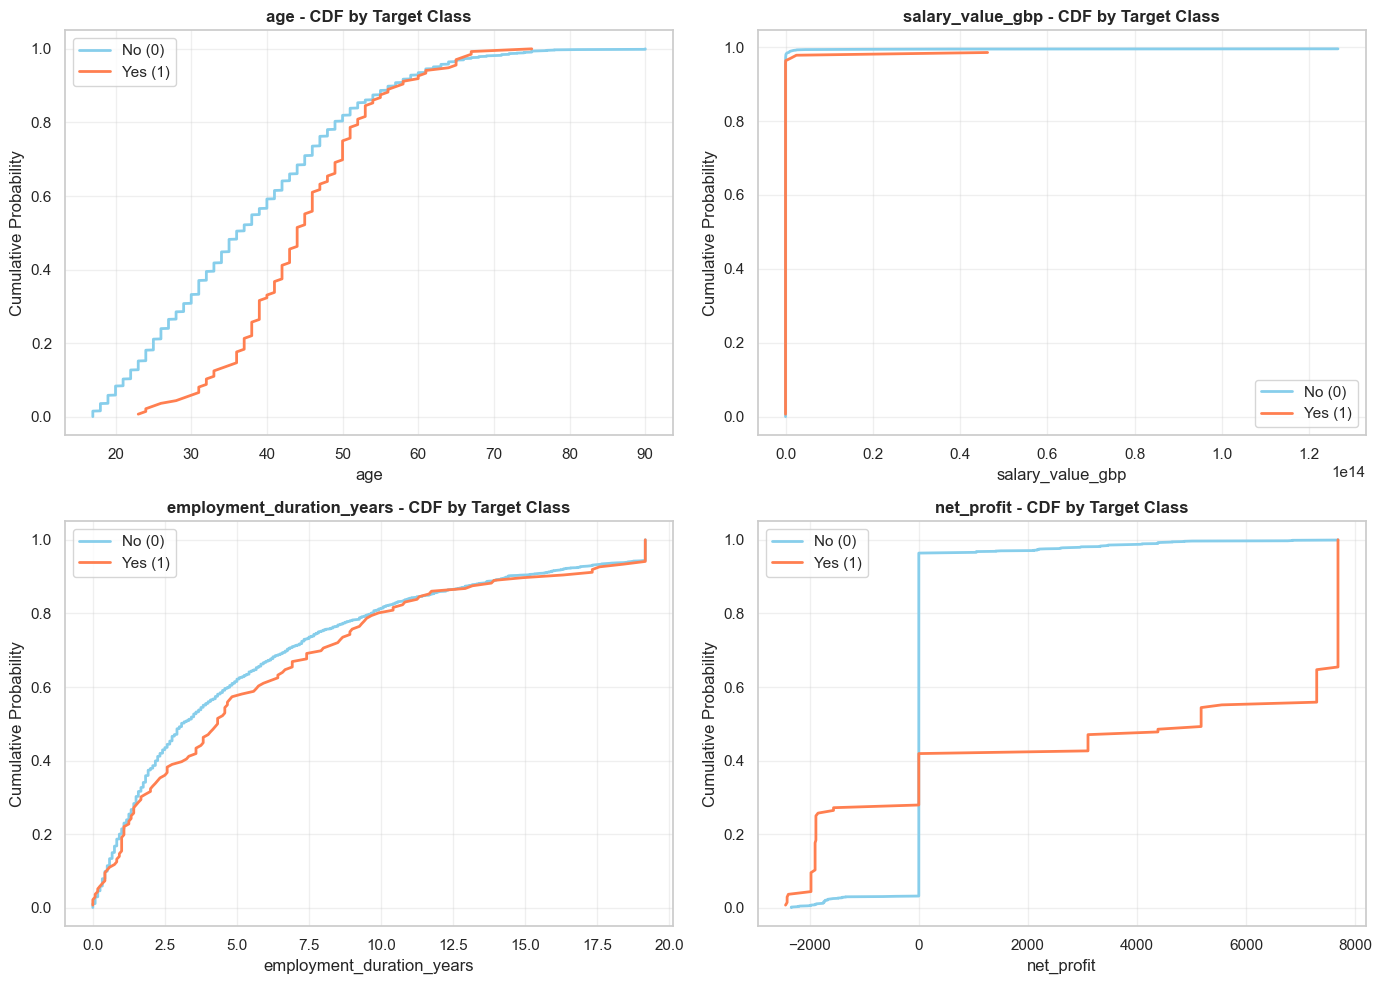

In [139]:
# 11. CUMULATIVE DISTRIBUTION FUNCTION (CDF) for Key Features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

key_features_cdf = ['age', 'salary_value_gbp', 'employment_duration_years', 'net_profit']
key_features_cdf = [f for f in key_features_cdf if f in clean_df.columns]

for idx, feature in enumerate(key_features_cdf):
    # CDF for class 0
    data_0 = clean_df[clean_df['created_account']==0][feature].sort_values()
    y_0 = np.arange(1, len(data_0)+1) / len(data_0)
    axes[idx].plot(data_0, y_0, label='No (0)', linewidth=2, color='skyblue')
    
    # CDF for class 1
    data_1 = clean_df[clean_df['created_account']==1][feature].sort_values()
    y_1 = np.arange(1, len(data_1)+1) / len(data_1)
    axes[idx].plot(data_1, y_1, label='Yes (1)', linewidth=2, color='coral')
    
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Cumulative Probability')
    axes[idx].set_title(f'{feature} - CDF by Target Class', fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / '11_cdf_plots.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {PLOTS_DIR / '11_cdf_plots.png'}")
plt.show()
plt.close()


In [140]:
# 12. FEATURE IMPORTANCE COMPARISON (Top Features Side-by-Side)
# Note: Feature importance analysis requires trained models.
# This analysis should be performed in a separate modeling notebook.
print("Feature importance analysis requires trained models.")
print("This analysis should be performed in a separate modeling notebook.")


Feature importance analysis requires trained models.
This analysis should be performed in a separate modeling notebook.


In [141]:
# 13. DISTRIBUTION OF PREDICTION SCORES (for target_df)
# Note: Prediction score analysis requires trained models.
# This analysis should be performed in a separate modeling notebook.
print("Prediction score analysis requires trained models.")
print("This analysis should be performed in a separate modeling notebook.")


Prediction score analysis requires trained models.
This analysis should be performed in a separate modeling notebook.


✓ Saved: ..\eda_plots\14_age_by_education.png


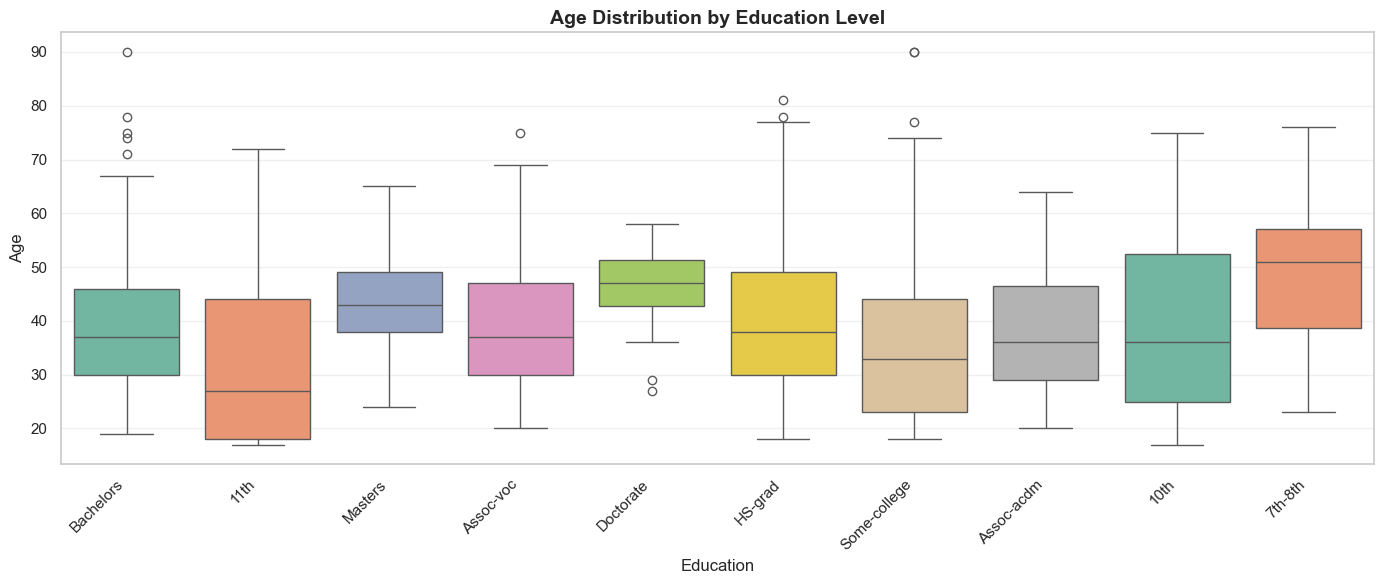

In [142]:
# 14. AGE DISTRIBUTION BY EDUCATION LEVEL
if 'education' in clean_df.columns and 'age' in clean_df.columns:
    plt.figure(figsize=(14, 6))
    
    # Box plot
    education_order = clean_df['education'].value_counts().head(10).index
    sns.boxplot(data=clean_df[clean_df['education'].isin(education_order)], 
                x='education', y='age', palette='Set2')
    plt.title('Age Distribution by Education Level', fontsize=14, fontweight='bold')
    plt.xlabel('Education')
    plt.ylabel('Age')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '14_age_by_education.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {PLOTS_DIR / '14_age_by_education.png'}")
    plt.show()
    plt.close()


✓ Saved: ..\eda_plots\15_salary_distribution.png


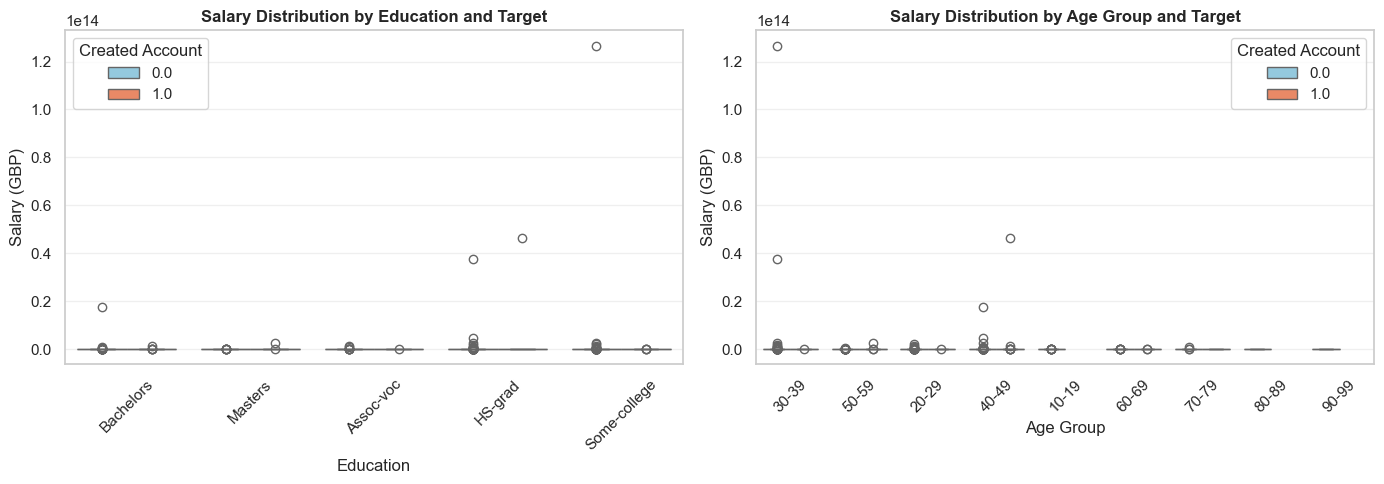

In [143]:
# 15. SALARY DISTRIBUTION BY TARGET AND KEY CATEGORICAL VARIABLES
if 'salary_value_gbp' in clean_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Salary by Education (if available)
    if 'education' in clean_df.columns:
        top_edu = clean_df['education'].value_counts().head(5).index
        sns.boxplot(data=clean_df[clean_df['education'].isin(top_edu)], 
                    x='education', y='salary_value_gbp', hue='created_account', 
                    palette=['skyblue', 'coral'], ax=axes[0])
        axes[0].set_title('Salary Distribution by Education and Target', fontweight='bold')
        axes[0].set_xlabel('Education')
        axes[0].set_ylabel('Salary (GBP)')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].legend(title='Created Account')
        axes[0].grid(axis='y', alpha=0.3)
    
    # Salary by Age Group (if available)
    if 'age_group' in clean_df.columns:
        sns.boxplot(data=clean_df, x='age_group', y='salary_value_gbp', 
                    hue='created_account', palette=['skyblue', 'coral'], ax=axes[1])
        axes[1].set_title('Salary Distribution by Age Group and Target', fontweight='bold')
        axes[1].set_xlabel('Age Group')
        axes[1].set_ylabel('Salary (GBP)')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Created Account')
        axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / '15_salary_distribution.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {PLOTS_DIR / '15_salary_distribution.png'}")
    plt.show()
    plt.close()


## Data Quality Score Calculation

Automatically calculate a data quality score based on various quality metrics.


In [144]:
def calculate_data_quality_score(campaign_df, mortgage_df, merged_df):
    """
    Calculate a comprehensive data quality score (out of 10) based on multiple metrics.
    """

    def safe_duplicate_count(df):
        """Safely count duplicates by checking only hashable columns."""
        try:
            # Try normal duplicate check first
            return df.duplicated().sum()
        except (TypeError, ValueError):
            # If that fails, check only columns with hashable dtypes
            hashable_cols = []
            for col in df.columns:
                try:
                    # Try to check if column is hashable by attempting a sample operation
                    sample = df[col].dropna().head(100)
                    if len(sample) > 0:
                        # Check if values are hashable
                        test_val = sample.iloc[0]
                        if isinstance(test_val, (str, int, float, bool, type(None), pd.Timestamp)):
                            hashable_cols.append(col)
                except:
                    continue
            
            if hashable_cols:
                return df[hashable_cols].duplicated().sum()
            else:
                return 0

    scores = {}
    max_scores = {}

    # 1. Duplicate Check (Max 2 points)
    campaign_duplicates = safe_duplicate_count(campaign_df)
    mortgage_duplicates = safe_duplicate_count(mortgage_df)

    if campaign_duplicates == 0 and mortgage_duplicates == 0:
        duplicate_score = 2.0
    elif campaign_duplicates == 0 or mortgage_duplicates == 0:
        duplicate_score = 1.0
    else:
        duplicate_score = 0.0

    scores['duplicates'] = duplicate_score
    max_scores['duplicates'] = 2.0

    # 2. Missing Values (Max 2.5 points)
    campaign_missing = campaign_df.isnull().sum()
    campaign_missing_excl_target = campaign_missing.drop('created_account', errors='ignore')
    campaign_missing_pct = (campaign_missing_excl_target.sum() / (len(campaign_df) * len(campaign_missing_excl_target))) * 100

    mortgage_missing_pct = (mortgage_df.isnull().sum().sum() / (len(mortgage_df) * len(mortgage_df.columns))) * 100

    total_missing_pct = (campaign_missing_pct + mortgage_missing_pct) / 2
    if total_missing_pct < 5:
        missing_score = 2.5
    elif total_missing_pct < 10:
        missing_score = 1.5
    elif total_missing_pct < 20:
        missing_score = 0.5
    else:
        missing_score = 0.0

    scores['missing_values'] = missing_score
    max_scores['missing_values'] = 2.5

    # 3. Merge Success Rate (Max 2 points)
    campaign_size = len(campaign_df)
    merged_size = len(merged_df)
    merge_rate = (merged_size / campaign_size) * 100 if campaign_size > 0 else 0

    if merge_rate > 70:
        merge_score = 2.0
    elif merge_rate > 50:
        merge_score = 1.5
    elif merge_rate > 30:
        merge_score = 1.0
    elif merge_rate > 10:
        merge_score = 0.5
    else:
        merge_score = 0.0

    scores['merge_success'] = merge_score
    max_scores['merge_success'] = 2.0

    # 4. Data Completeness (Max 1.5 points)
    merged_missing = merged_df.isnull().sum()
    merged_missing_excl_target = merged_missing.drop('created_account', errors='ignore')
    complete_cols = (merged_missing_excl_target == 0).sum()
    total_cols = len(merged_missing_excl_target)
    completeness_pct = (complete_cols / total_cols) * 100 if total_cols > 0 else 0

    if completeness_pct > 95:
        completeness_score = 1.5
    elif completeness_pct > 90:
        completeness_score = 1.0
    elif completeness_pct > 80:
        completeness_score = 0.5
    else:
        completeness_score = 0.0

    scores['completeness'] = completeness_score
    max_scores['completeness'] = 1.5

    # 5. Data Consistency (Max 1 point)
    campaign_consistent = campaign_df.dtypes.nunique() <= 2
    mortgage_consistent = mortgage_df.dtypes.nunique() <= 2

    if campaign_consistent and mortgage_consistent:
        consistency_score = 1.0
    elif campaign_consistent or mortgage_consistent:
        consistency_score = 0.5
    else:
        consistency_score = 0.0

    scores['consistency'] = consistency_score
    max_scores['consistency'] = 1.0

    # 6. Data Volume (Max 1 point)
    min_rows = min(len(campaign_df), len(mortgage_df))
    if min_rows > 30000:
        volume_score = 1.0
    elif min_rows > 20000:
        volume_score = 0.75
    elif min_rows > 10000:
        volume_score = 0.5
    elif min_rows > 5000:
        volume_score = 0.25
    else:
        volume_score = 0.0

    scores['volume'] = volume_score
    max_scores['volume'] = 1.0

    total_score = sum(scores.values())
    max_total = sum(max_scores.values())

    return {
        'scores': scores,
        'max_scores': max_scores,
        'total_score': total_score,
        'total_score_normalized': (total_score / max_total) * 10,
        'metrics': {
            'campaign_duplicates': campaign_duplicates,
            'mortgage_duplicates': mortgage_duplicates,
            'campaign_missing_pct': campaign_missing_pct,
            'mortgage_missing_pct': mortgage_missing_pct,
            'merge_rate': merge_rate,
            'completeness_pct': completeness_pct,
            'min_rows': min_rows
        }
    }

In [145]:

quality_results = calculate_data_quality_score(campaign, mortgage, merged_df)

print("="*60)
print("DATA QUALITY SCORE CALCULATION")
print("="*60)

# Total score
print(f"\n🔢 Total Score: {quality_results['total_score_normalized']:.2f}/10")

# Score breakdown
print("\n📊 Score Breakdown:")
print("-" * 60)
for metric, score in quality_results['scores'].items():
    max_score = quality_results['max_scores'][metric]
    pct = (score / max_score * 100) if max_score > 0 else 0
    print(f"  {metric.replace('_', ' ').title():20s}: {score:.2f}/{max_score:.1f} ({pct:.1f}%)")

# Detailed metrics
print("\n📌 Detailed Metrics:")
print("-" * 60)
metrics = quality_results['metrics']
print(f"  Campaign duplicates     : {metrics['campaign_duplicates']}")
print(f"  Mortgage duplicates     : {metrics['mortgage_duplicates']}")
print(f"  Campaign missing %      : {metrics['campaign_missing_pct']:.2f}%")
print(f"  Mortgage missing %      : {metrics['mortgage_missing_pct']:.2f}%")
print(f"  Merge success rate      : {metrics['merge_rate']:.2f}%")
print(f"  Completeness            : {metrics['completeness_pct']:.2f}%")
print(f"  Minimum rows available  : {metrics['min_rows']:,}")
print("="*60)

DATA QUALITY SCORE CALCULATION

🔢 Total Score: 9.00/10

📊 Score Breakdown:
------------------------------------------------------------
  Duplicates          : 2.00/2.0 (100.0%)
  Missing Values      : 2.50/2.5 (100.0%)
  Merge Success       : 1.50/2.0 (75.0%)
  Completeness        : 1.50/1.5 (100.0%)
  Consistency         : 0.50/1.0 (50.0%)
  Volume              : 1.00/1.0 (100.0%)

📌 Detailed Metrics:
------------------------------------------------------------
  Campaign duplicates     : 0
  Mortgage duplicates     : 0
  Campaign missing %      : 2.38%
  Mortgage missing %      : 0.00%
  Merge success rate      : 51.75%
  Completeness            : 100.00%
  Minimum rows available  : 32,060
